In [1]:
import pandas as pd
import geopandas as gp
import os
import numpy as np
import requests
from urllib.request import urlopen
import certifi
import ssl
from zipfile import ZipFile
from math import sqrt
#Set options for pandas displays
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Wisconsin 2016

## Election Results Documentation:


Election results and precinct shapefile from Wisconsin State Legislature Open Data Portal (https://data-ltsb.opendata.arcgis.com/).


## Shapefile Modifications Documentation:


The shapefile used for the 2016 election results was the 2017 wards shapefile. The 2017 wards shapefile featured multiple changes and corrections to the ward boundaries what were already in effect for the November 2016 general election but were not in the January 2016 wards shapefile.

Several thousand votes were reported for the town of Menasha, which had almost entirely been incorporated into the village of Fox Crossing. The ward numbers in the Menasha results matched exactly the wards in Fox Crossing that didn't report any results, so the Menasha results were applied to Fox Crossing.

The following wards had been added due to annexations subsequent to the 2016 general election. They were merged back into the 2016 wards along with any associated election results.

Brown: Wrightstown 5
Clark: Abbotsford 7
Dane: DeForest 18, Sun Prairie 22
Eau Claire: Eau Claire 68
Fond du Lac: Fond du Lac 28
Green Lake: Green Lake 4
Kenosha: Kenosha 94
La Crosse: Holmen 12
Manitowoc: Manitowoc 29
Marathon: Wausau 48
Monroe: Tomah 21
Outagamie: Combined Locks 6, Kaukauna 13
Washington: Slinger 9
Waukesha: Sussex 10
Waupaca: Clintonville 9, 10
Winnebago: Menasha 39-42, Neenah 26

These additional changes were made to reflect the 2016 ward-by-ward results.

Grant: Split Platteville 8/9
Jefferson: Renumber Watertown 3 to Watertown 19
La Crosse: Split Holland 1 from Holmen 2
Winnebago: Relabel Fox Crossing 8-13 as Menasha 8-13

Note that the election results for Holland 1-6 and Holmen 1-11 in La Crosse County were reapportioned accordingly using the same whole population methodology as the WI Legislative Technology Services Bureau.

## Candidate List

G16PRERTRU - Donald J. Trump (Republican Party)<br>
G16PREDCLI - Hillary Clinton (Democratic Party)<br>
G16PRECCAS - Darrell L. Castle (Constitution Party)<br>
G16PRELJOH - Gary Johnson (Libertarian Party)<br>
G16PREGSTE - Jill Stein (Green Party)<br>
G16PREOTH - Write-in Votes<br>
<br>
G16USSRJOH - Ron Johnson (Republican Party)<br>
G16USSDFEI - Russ Feingold (Democratic Party)<br>
G16USSLAND - Phillip N. Anderson (Libertarian Party)<br>
G16USSOTH - Write-in Votes<br>

## Load Election/Shapefile Data

In [2]:
source = gp.read_file('./raw-data/WI_20122020_Election_Data_Wards_2017/WI_20122020_Election Data_Wards_2017.shp')

#### Take a look at the dataframe

In [3]:
source.head(1)

,OBJECTID_1,OBJECTID,GEOID,MCD_FIPS,CNTY_FIPS,LSAD,NAME,ASM,SEN,CON,COUSUBFP,CNTY_NAME,STR_WARDS,PERSONS,PERSONS18,WHITE,BLACK,HISPANIC,ASIAN,AMINDIAN,PISLAND,OTHER,OTHERMLT,WHITE18,BLACK18,HISPANIC18,ASIAN18,AMINDIAN18,PISLAND18,OTHER18,OTHERMLT18,CDATOT16,CDADEM16,CDADEM216,CDAREP16,CDAIND16,CDASCT16,PRETOT16,PREDEM16,PREREP16,PREGRN16,PRELIB16,PRECON16,PREIND16,PREIND216,PREIND316,PREIND416,PREIND516,PREIND616,PREIND716,PREIND816,PREIND916,PREIND1016,PREIND1116,PRESCT16,USHTOT16,USHDEM16,USHDEM216,USHREP16,USHGRN16,USHLIB16,USHIND16,USHSCT16,USSTOT16,USSDEM16,USSREP16,USSREP216,USSLIB16,USSSCT16,WSATOT16,WSADEM16,WSAREP16,WSALIB16,WSAIND16,WSASCT16,WSSTOT16,WSSDEM16,WSSREP16,WSSIND16,WSSSCT16,GOVTOT14,GOVDEM14,GOVREP14,GOVREP214,GOVREP314,GOVCON14,GOVIND14,GOVIND214,GOVIND314,GOVIND414,GOVIND514,GOVSCT14,SOSTOT14,SOSDEM14,SOSREP14,SOSCON14,SOSIND14,SOSSCT14,TRSTOT14,TRSDEM14,TRSREP14,TRSCON14,TRSIND14,TRSIND214,TRSSCT14,USHTOT14,USHDEM14,USHREP14,USHREP214,USHIND14,USHIND214,USHSCT14,USSTOT14,USSDEM14,USSREP14,USSIND14,USSSCT14,WAGTOT14,WAGDEM14,WAGREP14,WAGIND14,WAGSCT14,WSATOT14,WSADEM14,WSAREP14,WSAREP214,WSAIND14,WSASCT14,CDATOT12,CDADEM12,CDADEM212,CDAREP12,CDAIND12,CDASCT12,GOVTOT12,GOVDEM12,GOVREP12,GOVIND12,GOVSCT12,PRETOT12,PREDEM12,PREREP12,PRECON12,PREIND12,PREIND212,PREIND312,PREIND412,PREIND512,PREIND612,PRESCT12,USHTOT12,USHDEM12,USHREP12,USHIND12,USHSCT12,USSTOT12,USSDEM12,USSREP12,USSCON12,USSIND12,USSIND212,USSIND312,USSSCT12,WAGTOT12,WAGDEM12,WAGDEM212,WAGREP12,WAGIND12,WAGSCT12,WSATOT12,WSADEM12,WSADEM212,WSAREP12,WSAREP212,WSAIND12,WSAIND212,WSASCT12,WSSTOT12,WSSDEM12,WSSREP12,WSSREP212,WSSCON12,WSSIND12,WSSSCT12,WSSAME12,Shape__Are,Shape__Len,geometry
0,3001,3001,55073545000005,5507354500,55073,25,Mosinee,86,29,7,54500,Marathon,0005,604,454,579,6,14,1,4,0,0,0,442,0,8,1,3,0,0,0,269,262,0,0,0,7,369,129,219,3,10,4,1,0,0,0,0,0,0,0,0,0,0,3,358,128,0,230,0,0,0,0,366,148,201,0,16,1,358,140,202,0,16,0,0,0,0,0,0,314,118,193,0,0,0,1,2,0,0,0,0,308,139,161,4,4,0,303,124,163,2,5,9,0,310,112,196,0,2,0,0,310,96,214,0,0,309,112,190,7,0,306,124,182,0,0,0,245,0,0,239,6,0,341,136,198,5,2,363,170,186,1,3,0,0,2,0,0,1,352,142,209,0,1,357,171,173,0,7,5,0,1,265,257,0,0,0,8,347,164,0,182,0,0,0,1,0,0,0,0,0,0,0,0,0.000074,0.054695,"POLYGON ((-89.72744 44.78966, -89.72716 44.789..."


## Load VEST data

In [4]:
vest = gp.read_file('./raw-data/wi_vest_16/wi_vest_16.shp')

#### Take a look at the dataframe

In [5]:
vest.head(1)

,OBJECTID_1,OBJECTID,GEOID,MCD_FIPS,CNTY_FIPS,LSAD,NAME,ASM,SEN,CON,COUSUBFP,CNTY_NAME,STR_WARDS,PERSONS,PERSONS18,WHITE,BLACK,HISPANIC,ASIAN,AMINDIAN,PISLAND,OTHER,OTHERMLT,WHITE18,BLACK18,HISPANIC18,ASIAN18,AMINDIAN18,PISLAND18,OTHER18,OTHERMLT18,G16PRERTRU,G16PREDCLI,G16PRECCAS,G16PRELJOH,G16PREGSTE,G16PREOTH,G16USSRJOH,G16USSDFEI,G16USSLAND,G16USSOTH,geometry
0,3001,3001,55073545000005,5507354500,55073,25,Mosinee,86,29,7,54500,Marathon,0005,604,454,579,6,14,1,4,0,0,0,442,0,8,1,3,0,0,0,219,129,4,10,3,4,201,148,16,1,"POLYGON ((-89.72744 44.78966, -89.72716 44.789..."


## Clean Election Data Formatting

In [6]:
known_cands = ['PRETOT16','USSTOT16','PREREP16','PREDEM16','PRECON16','PRELIB16','PREGRN16','USSREP16','USSDEM16','USSLIB16']
writein_pre = []
writein_sen = []

for i in source.columns:
    if '16' in i:
        if i not in known_cands:
            if i.startswith('PRE'):
                writein_pre.append(i)
            elif i.startswith('USS'):
                writein_sen.append(i)
                
print('Columns in source data to combine to create Presidential write-in field: ', writein_pre)
print('\n')
print('Columns in source data to combine to create US Senate write-in field: ', writein_sen)

Columns in source data to combine to create Presidential write-in field:  ['PREIND16', 'PREIND216', 'PREIND316', 'PREIND416', 'PREIND516', 'PREIND616', 'PREIND716', 'PREIND816', 'PREIND916', 'PREIND1016', 'PREIND1116', 'PRESCT16']


Columns in source data to combine to create US Senate write-in field:  ['USSREP216', 'USSSCT16']


#### Create Write-In Fields

In [7]:
#Fill all NA values to 0
source = source.fillna(0)
#Set all to data fields to integers
for i in source.columns:
    if '16' in i:
        source[i] = source[i].astype(int)

In [8]:
#Sum all other fields for President and US Senate into their respective write-in fields
source['G16PREOTH'] = source.apply(lambda x: sum([x[i] for i in writein_pre]),axis=1)
source['G16USSOTH'] = source.apply(lambda x: sum([x[i] for i in writein_sen]),axis=1)

In [9]:
source.head(1)

,OBJECTID_1,OBJECTID,GEOID,MCD_FIPS,CNTY_FIPS,LSAD,NAME,ASM,SEN,CON,COUSUBFP,CNTY_NAME,STR_WARDS,PERSONS,PERSONS18,WHITE,BLACK,HISPANIC,ASIAN,AMINDIAN,PISLAND,OTHER,OTHERMLT,WHITE18,BLACK18,HISPANIC18,ASIAN18,AMINDIAN18,PISLAND18,OTHER18,OTHERMLT18,CDATOT16,CDADEM16,CDADEM216,CDAREP16,CDAIND16,CDASCT16,PRETOT16,PREDEM16,PREREP16,PREGRN16,PRELIB16,PRECON16,PREIND16,PREIND216,PREIND316,PREIND416,PREIND516,PREIND616,PREIND716,PREIND816,PREIND916,PREIND1016,PREIND1116,PRESCT16,USHTOT16,USHDEM16,USHDEM216,USHREP16,USHGRN16,USHLIB16,USHIND16,USHSCT16,USSTOT16,USSDEM16,USSREP16,USSREP216,USSLIB16,USSSCT16,WSATOT16,WSADEM16,WSAREP16,WSALIB16,WSAIND16,WSASCT16,WSSTOT16,WSSDEM16,WSSREP16,WSSIND16,WSSSCT16,GOVTOT14,GOVDEM14,GOVREP14,GOVREP214,GOVREP314,GOVCON14,GOVIND14,GOVIND214,GOVIND314,GOVIND414,GOVIND514,GOVSCT14,SOSTOT14,SOSDEM14,SOSREP14,SOSCON14,SOSIND14,SOSSCT14,TRSTOT14,TRSDEM14,TRSREP14,TRSCON14,TRSIND14,TRSIND214,TRSSCT14,USHTOT14,USHDEM14,USHREP14,USHREP214,USHIND14,USHIND214,USHSCT14,USSTOT14,USSDEM14,USSREP14,USSIND14,USSSCT14,WAGTOT14,WAGDEM14,WAGREP14,WAGIND14,WAGSCT14,WSATOT14,WSADEM14,WSAREP14,WSAREP214,WSAIND14,WSASCT14,CDATOT12,CDADEM12,CDADEM212,CDAREP12,CDAIND12,CDASCT12,GOVTOT12,GOVDEM12,GOVREP12,GOVIND12,GOVSCT12,PRETOT12,PREDEM12,PREREP12,PRECON12,PREIND12,PREIND212,PREIND312,PREIND412,PREIND512,PREIND612,PRESCT12,USHTOT12,USHDEM12,USHREP12,USHIND12,USHSCT12,USSTOT12,USSDEM12,USSREP12,USSCON12,USSIND12,USSIND212,USSIND312,USSSCT12,WAGTOT12,WAGDEM12,WAGDEM212,WAGREP12,WAGIND12,WAGSCT12,WSATOT12,WSADEM12,WSADEM212,WSAREP12,WSAREP212,WSAIND12,WSAIND212,WSASCT12,WSSTOT12,WSSDEM12,WSSREP12,WSSREP212,WSSCON12,WSSIND12,WSSSCT12,WSSAME12,Shape__Are,Shape__Len,geometry,G16PREOTH,G16USSOTH
0,3001,3001,55073545000005,5507354500,55073,25,Mosinee,86,29,7,54500,Marathon,0005,604,454,579,6,14,1,4,0,0,0,442,0,8,1,3,0,0,0,269,262,0,0,0,7,369,129,219,3,10,4,1,0,0,0,0,0,0,0,0,0,0,3,358,128,0,230,0,0,0,0,366,148,201,0,16,1,358,140,202,0,16,0,0,0,0,0,0,314,118,193,0,0,0,1,2,0,0,0,0,308,139,161,4,4,0,303,124,163,2,5,9,0,310,112,196,0,2,0,0,310,96,214,0,0,309,112,190,7,0,306,124,182,0,0,0,245,0,0,239,6,0,341,136,198,5,2,363,170,186,1,3,0,0,2,0,0,1,352,142,209,0,1,357,171,173,0,7,5,0,1,265,257,0,0,0,8,347,164,0,182,0,0,0,1,0,0,0,0,0,0,0,0,0.000074,0.054695,"POLYGON ((-89.72744 44.78966, -89.72716 44.789...",4,1


#### Rename Columns to Match VEST

In [10]:
rename_dict = {known_cands[2]:'G16PRERTRU',known_cands[3]:'G16PREDCLI',known_cands[4]:'G16PRECCAS',
               known_cands[5]:'G16PRELJOH',known_cands[6]:'G16PREGSTE',
               known_cands[7]:'G16USSRJOH',known_cands[8]:'G16USSDFEI',known_cands[9]:'G16USSLAND'}
source.rename(columns=rename_dict,inplace=True)
source.head(1)

,OBJECTID_1,OBJECTID,GEOID,MCD_FIPS,CNTY_FIPS,LSAD,NAME,ASM,SEN,CON,COUSUBFP,CNTY_NAME,STR_WARDS,PERSONS,PERSONS18,WHITE,BLACK,HISPANIC,ASIAN,AMINDIAN,PISLAND,OTHER,OTHERMLT,WHITE18,BLACK18,HISPANIC18,ASIAN18,AMINDIAN18,PISLAND18,OTHER18,OTHERMLT18,CDATOT16,CDADEM16,CDADEM216,CDAREP16,CDAIND16,CDASCT16,PRETOT16,G16PREDCLI,G16PRERTRU,G16PREGSTE,G16PRELJOH,G16PRECCAS,PREIND16,PREIND216,PREIND316,PREIND416,PREIND516,PREIND616,PREIND716,PREIND816,PREIND916,PREIND1016,PREIND1116,PRESCT16,USHTOT16,USHDEM16,USHDEM216,USHREP16,USHGRN16,USHLIB16,USHIND16,USHSCT16,USSTOT16,G16USSDFEI,G16USSRJOH,USSREP216,G16USSLAND,USSSCT16,WSATOT16,WSADEM16,WSAREP16,WSALIB16,WSAIND16,WSASCT16,WSSTOT16,WSSDEM16,WSSREP16,WSSIND16,WSSSCT16,GOVTOT14,GOVDEM14,GOVREP14,GOVREP214,GOVREP314,GOVCON14,GOVIND14,GOVIND214,GOVIND314,GOVIND414,GOVIND514,GOVSCT14,SOSTOT14,SOSDEM14,SOSREP14,SOSCON14,SOSIND14,SOSSCT14,TRSTOT14,TRSDEM14,TRSREP14,TRSCON14,TRSIND14,TRSIND214,TRSSCT14,USHTOT14,USHDEM14,USHREP14,USHREP214,USHIND14,USHIND214,USHSCT14,USSTOT14,USSDEM14,USSREP14,USSIND14,USSSCT14,WAGTOT14,WAGDEM14,WAGREP14,WAGIND14,WAGSCT14,WSATOT14,WSADEM14,WSAREP14,WSAREP214,WSAIND14,WSASCT14,CDATOT12,CDADEM12,CDADEM212,CDAREP12,CDAIND12,CDASCT12,GOVTOT12,GOVDEM12,GOVREP12,GOVIND12,GOVSCT12,PRETOT12,PREDEM12,PREREP12,PRECON12,PREIND12,PREIND212,PREIND312,PREIND412,PREIND512,PREIND612,PRESCT12,USHTOT12,USHDEM12,USHREP12,USHIND12,USHSCT12,USSTOT12,USSDEM12,USSREP12,USSCON12,USSIND12,USSIND212,USSIND312,USSSCT12,WAGTOT12,WAGDEM12,WAGDEM212,WAGREP12,WAGIND12,WAGSCT12,WSATOT12,WSADEM12,WSADEM212,WSAREP12,WSAREP212,WSAIND12,WSAIND212,WSASCT12,WSSTOT12,WSSDEM12,WSSREP12,WSSREP212,WSSCON12,WSSIND12,WSSSCT12,WSSAME12,Shape__Are,Shape__Len,geometry,G16PREOTH,G16USSOTH
0,3001,3001,55073545000005,5507354500,55073,25,Mosinee,86,29,7,54500,Marathon,0005,604,454,579,6,14,1,4,0,0,0,442,0,8,1,3,0,0,0,269,262,0,0,0,7,369,129,219,3,10,4,1,0,0,0,0,0,0,0,0,0,0,3,358,128,0,230,0,0,0,0,366,148,201,0,16,1,358,140,202,0,16,0,0,0,0,0,0,314,118,193,0,0,0,1,2,0,0,0,0,308,139,161,4,4,0,303,124,163,2,5,9,0,310,112,196,0,2,0,0,310,96,214,0,0,309,112,190,7,0,306,124,182,0,0,0,245,0,0,239,6,0,341,136,198,5,2,363,170,186,1,3,0,0,2,0,0,1,352,142,209,0,1,357,171,173,0,7,5,0,1,265,257,0,0,0,8,347,164,0,182,0,0,0,1,0,0,0,0,0,0,0,0,0.000074,0.054695,"POLYGON ((-89.72744 44.78966, -89.72716 44.789...",4,1


#### Subset source columns to match VEST

In [11]:
source = source[vest.columns]
source.head(1)

,OBJECTID_1,OBJECTID,GEOID,MCD_FIPS,CNTY_FIPS,LSAD,NAME,ASM,SEN,CON,COUSUBFP,CNTY_NAME,STR_WARDS,PERSONS,PERSONS18,WHITE,BLACK,HISPANIC,ASIAN,AMINDIAN,PISLAND,OTHER,OTHERMLT,WHITE18,BLACK18,HISPANIC18,ASIAN18,AMINDIAN18,PISLAND18,OTHER18,OTHERMLT18,G16PRERTRU,G16PREDCLI,G16PRECCAS,G16PRELJOH,G16PREGSTE,G16PREOTH,G16USSRJOH,G16USSDFEI,G16USSLAND,G16USSOTH,geometry
0,3001,3001,55073545000005,5507354500,55073,25,Mosinee,86,29,7,54500,Marathon,0005,604,454,579,6,14,1,4,0,0,0,442,0,8,1,3,0,0,0,219,129,4,10,3,4,201,148,16,1,"POLYGON ((-89.72744 44.78966, -89.72716 44.789..."


#### Confirm all fields from VEST are in the source data

In [12]:
vest_cols = list(vest.columns)
source_cols = list(source.columns)
not_matching = set(set(vest_cols) ^ set(source_cols))
if len(not_matching)==0:
    print('All columns in VEST file are in the source file.')
else:
    print('The following columns appear in just one dataset: ', not_matching)

All columns in VEST file are in the source file.


#### Confirm columns are in the same order in both datasets

In [13]:
print(vest_cols == source_cols)

True


In [14]:
#Put columns in VEST's order
source = source[vest_cols]

## Validate Election Results - Statewide

In [15]:
data_columns = [i for i in vest.columns if '16' in i]

no_diff = True
for race in data_columns:
    if (sum(vest[race])-sum(source[race]) != 0):
        print(race+" has a difference of "+str(sum(vest[race])-sum(source[race]))+" votes")
        print("\tVEST: "+str(sum(vest[race]))+" votes")
        print("\tSOURCE DATA: "+str(sum(source[race]))+" votes")
        no_diff = False
if (no_diff):
    print("No races contain vote differences")
else:
    print("All other races are equal")

No races contain vote differences


## Shapefile Modifications

In [16]:
print('VEST Shape: ', vest.shape)
print('Source Shape: ', source.shape)
print('Difference in precincts: ', abs(source.shape[0]-vest.shape[0]))

VEST Shape:  (6872, 42)
Source Shape:  (6895, 42)
Difference in precincts:  23


### Create a Unique ID in both the VEST and Source 

In [17]:
print(len(vest)==len(vest['GEOID'].unique()))
print(len(source)==len(source['GEOID'].unique()))

False
True


In [18]:
geoids = []
not_unique = []
for i in vest['GEOID']:
    if i not in geoids:
        geoids.append(i)
    else:
        not_unique.append(i)
print('There are ', len(not_unique), ' not unique GEOIDs. They are: ', not_unique)

There are  1  not unique GEOIDs. They are:  ['55063354500001']


In [19]:
not_unique_df = vest[vest['GEOID'].isin(not_unique)].copy()
not_unique_df['GEOID'] = not_unique_df.apply(lambda x: ''.join([x['MCD_FIPS'],x['STR_WARDS']]),axis=1)

In [20]:
vest = vest[vest['GEOID']!='55063354500001']
vest = gp.GeoDataFrame(pd.concat([not_unique_df,vest]),crs=vest.crs)

In [21]:
print(len(vest)==len(vest['GEOID'].unique()))

True


### Check the Number of Precincts in each county for VEST and Source

In [22]:
source_cos = sorted([str(i) for i in source['CNTY_NAME'].unique()])
vest_cos =sorted([str(i) for i in vest['CNTY_NAME'].unique()])
print(source_cos==vest_cos)

False


In [23]:
print(set(set(source_cos) ^ set(vest_cos)))

{'0'}


In [24]:
source_0 = source[source['CNTY_NAME'].isin(['0',0])]
vest_0 = vest[vest['CNTY_NAME'].isin(['0',0])]
display(source_0)
display(vest_0)

,OBJECTID_1,OBJECTID,GEOID,MCD_FIPS,CNTY_FIPS,LSAD,NAME,ASM,SEN,CON,COUSUBFP,CNTY_NAME,STR_WARDS,PERSONS,PERSONS18,WHITE,BLACK,HISPANIC,ASIAN,AMINDIAN,PISLAND,OTHER,OTHERMLT,WHITE18,BLACK18,HISPANIC18,ASIAN18,AMINDIAN18,PISLAND18,OTHER18,OTHERMLT18,G16PRERTRU,G16PREDCLI,G16PRECCAS,G16PRELJOH,G16PREGSTE,G16PREOTH,G16USSRJOH,G16USSDFEI,G16USSLAND,G16USSOTH,geometry
73,3074,3074,55073844750026,5507384475,55073,25,Wausau,0,0,0,84475,0,0026,1642,1247,1411,19,73,120,14,0,1,4,1119,10,42,65,10,0,0,1,412,339,6,43,14,15,435,358,32,1,"POLYGON ((-89.72950 44.97001, -89.72846 44.969..."
77,3078,3078,55073844750030,5507384475,55073,25,Wausau,0,0,0,84475,0,0030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,"POLYGON ((-89.70809 44.96182, -89.70809 44.961..."
78,3079,3079,55073844750031,5507384475,55073,25,Wausau,0,0,0,84475,0,0031,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"POLYGON ((-89.57828 44.95984, -89.58333 44.959..."
79,3080,3080,55073844750032,5507384475,55073,25,Wausau,0,0,0,84475,0,0032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"POLYGON ((-89.66424 44.98765, -89.66425 44.987..."
80,3081,3081,55073844750033,5507384475,55073,25,Wausau,0,0,0,84475,0,0033,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,"POLYGON ((-89.69682 44.96014, -89.69735 44.960..."
81,3082,3082,55073844750034,5507384475,55073,25,Wausau,0,0,0,84475,0,0034,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"POLYGON ((-89.66245 44.99470, -89.66323 44.994..."
82,3083,3083,55073844750035,5507384475,55073,25,Wausau,0,0,0,84475,0,0035,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"POLYGON ((-89.70148 44.95151, -89.70148 44.951..."
83,3084,3084,55073844750036,5507384475,55073,25,Wausau,0,0,0,84475,0,0036,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"POLYGON ((-89.70139 44.94612, -89.70235 44.946..."
84,3085,3085,55073844750037,5507384475,55073,25,Wausau,0,0,0,84475,0,0037,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,"POLYGON ((-89.69004 44.96623, -89.69005 44.966..."
85,3086,3086,55073844750048,5507384475,55073,25,Wausau,0,0,0,84475,0,0048,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,"POLYGON ((-89.74721 44.96593, -89.74731 44.963..."


,OBJECTID_1,OBJECTID,GEOID,MCD_FIPS,CNTY_FIPS,LSAD,NAME,ASM,SEN,CON,COUSUBFP,CNTY_NAME,STR_WARDS,PERSONS,PERSONS18,WHITE,BLACK,HISPANIC,ASIAN,AMINDIAN,PISLAND,OTHER,OTHERMLT,WHITE18,BLACK18,HISPANIC18,ASIAN18,AMINDIAN18,PISLAND18,OTHER18,OTHERMLT18,G16PRERTRU,G16PREDCLI,G16PRECCAS,G16PRELJOH,G16PREGSTE,G16PREOTH,G16USSRJOH,G16USSDFEI,G16USSLAND,G16USSOTH,geometry


#### Add County Names to the Source File

In [25]:
'''This function uses the Census API to retrieve all of the county names and FIPS for a given state.
Input: State FIPS code as a string.
Output: pandas data frame of county fips and names for the given state.'''
def county_names(state_fips):
    """Inputs: state fips code
    Process: Retrieves a list of counties in the given state from the Census API.  
    Outputs: A list of county fips codes in the state. """
    #uses the fips input into the census api
    resp = requests.get(
        "https://api.census.gov/data/2010/dec/sf1"
        "?get=NAME&for=county:*&in=state:{}".format(state_fips)  #uses the fips input to locate the state
    )
    #retrieves the data as a json 
    test = resp.json()
    header, *rows = resp.json()
    #county column is "county"
    county_column_index = header.index("county")
    county_fips = (row[county_column_index] for row in rows) #sequence of counties 
    county_names_index = header.index("NAME")
    county_names = (row[county_names_index] for row in rows) #names of the counties
    county_fips = np.array(list(county_fips)) #make the sets into numpy arrays
    county_names = np.array(list(county_names))
    df = pd.DataFrame({'CNTY_FIPS': county_fips, 'COUNTYNAMES': county_names}) #make pd dataframe of arrays
    df[['COUNTY_NAME','state']] = df.COUNTYNAMES.str.split(",",expand=True)
    del df['state']
    del df['COUNTYNAMES']
    return df  #returns the fips codes of all counties

In [26]:
wi_counties = county_names('55')
wi_counties['CNTY_FIPS'] = wi_counties['CNTY_FIPS'].apply(lambda x: ''.join(['55',x]))
wi_counties['COUNTY'] = wi_counties.apply(lambda x: x['COUNTY_NAME'][:-7], axis = 1)
del wi_counties['COUNTY_NAME']
source = pd.merge(source,wi_counties, on=['CNTY_FIPS'])
source['CNTY_NAME'] = source['COUNTY']
del source['COUNTY']
source.head(1)

,OBJECTID_1,OBJECTID,GEOID,MCD_FIPS,CNTY_FIPS,LSAD,NAME,ASM,SEN,CON,COUSUBFP,CNTY_NAME,STR_WARDS,PERSONS,PERSONS18,WHITE,BLACK,HISPANIC,ASIAN,AMINDIAN,PISLAND,OTHER,OTHERMLT,WHITE18,BLACK18,HISPANIC18,ASIAN18,AMINDIAN18,PISLAND18,OTHER18,OTHERMLT18,G16PRERTRU,G16PREDCLI,G16PRECCAS,G16PRELJOH,G16PREGSTE,G16PREOTH,G16USSRJOH,G16USSDFEI,G16USSLAND,G16USSOTH,geometry
0,3001,3001,55073545000005,5507354500,55073,25,Mosinee,86,29,7,54500,Marathon,0005,604,454,579,6,14,1,4,0,0,0,442,0,8,1,3,0,0,0,219,129,4,10,3,4,201,148,16,1,"POLYGON ((-89.72744 44.78966, -89.72716 44.789..."


#### Check that all county names are the same in source and VEST data

In [27]:
source_cos = sorted([str(i) for i in source['CNTY_NAME'].unique()])
vest_cos =sorted([str(i) for i in vest['CNTY_NAME'].unique()])
print(source_cos==vest_cos)

True


## Validate Election Results - County Totals

In [28]:
no_diff = True
diff_counties=[]
for i in data_columns:
    diff = vest.groupby(["CNTY_NAME"]).sum()[i]-source.groupby(["CNTY_NAME"]).sum()[i]
    for val in diff[diff != 0].index.values.tolist():
        if val not in diff_counties:
            diff_counties.append(val)
    if len(diff[diff != 0]!=0):
        print(i)
        print(diff[diff != 0].to_string(header=False))
        #print('VEST total: ')
        no_diff = False
if (no_diff):
    print("No counties contain vote differences")
else:
    print("All other county race totals are equal")

No counties contain vote differences


## Work for Precinct-Level Checks

### Check the number of wards in each county for VEST and source data

In [29]:
'''This function retrieves a list of all specified geographies in a dataframe.
Input: pandas dataframe
Output: list of parishes'''
def county_list(df,geog_field):
    #Get list of all unique parishes in the dataset.
    geog = df[geog_field].unique()
    #print(geog_field, ' list', geog)
    return geog
'''This function creates a dictionary of geography names (key) and the dataframe subsetted to precincts in that geography (value). 
Input: pandas dataframe of election results
Output: Dictionary where keys are geography names and values are dataframes where the geography field value is the key.'''
def subset_county(df,geog_field):
    geog_listing = county_list(df, geog_field)
    geog_dict = {}
    for g in geog_listing:
        sub_df = df[df[geog_field] == g]
        mini_dict = {g:sub_df}
        geog_dict.update(mini_dict)
    return geog_dict

In [30]:
dict_source = subset_county(source,'CNTY_NAME')
dict_vest = subset_county(vest,'CNTY_NAME')

for k,v in dict_source.items():
    for i,j in dict_vest.items():
        if k == i:
            if len(v) == len(j):
                continue
            else:
                print(k.upper(), ' HAS DIFFERENT NUMBER OF PRECINCTS IN VEST AND SOURCE.')
                print('SOURCE has ', len(v), ' precincts.')
                print('VEST has ', len(j), ' precicnts.')
            print('------------------------------------------------------------------')
        else:
            continue

MARATHON  HAS DIFFERENT NUMBER OF PRECINCTS IN VEST AND SOURCE.
SOURCE has  180  precincts.
VEST has  179  precicnts.
------------------------------------------------------------------
MONROE  HAS DIFFERENT NUMBER OF PRECINCTS IN VEST AND SOURCE.
SOURCE has  100  precincts.
VEST has  99  precicnts.
------------------------------------------------------------------
BROWN  HAS DIFFERENT NUMBER OF PRECINCTS IN VEST AND SOURCE.
SOURCE has  187  precincts.
VEST has  186  precicnts.
------------------------------------------------------------------
CLARK  HAS DIFFERENT NUMBER OF PRECINCTS IN VEST AND SOURCE.
SOURCE has  84  precincts.
VEST has  83  precicnts.
------------------------------------------------------------------
DANE  HAS DIFFERENT NUMBER OF PRECINCTS IN VEST AND SOURCE.
SOURCE has  446  precincts.
VEST has  444  precicnts.
------------------------------------------------------------------
EAU CLAIRE  HAS DIFFERENT NUMBER OF PRECINCTS IN VEST AND SOURCE.
SOURCE has  128  precinc

### Marathon County

In [31]:
non_data_cols = ['OBJECTID','OBJECTID_1','GEOID','MCD_FIPS','CNTY_FIPS','LSAD','NAME','ASM','SEN','CON','COUSUBFP','CNTY_NAME','STR_WARDS']
CRS = vest.crs

In [32]:
marathon_source = source[source['CNTY_NAME']=='Marathon'].copy()
marathon_vest = vest[vest['CNTY_NAME']=='Marathon'].copy()
print('Wards in source data: ', str(len(marathon_source)))
print('Wards in VEST data: ', str(len(marathon_vest)))

Wards in source data:  180
Wards in VEST data:  179


In [33]:
to_dissolve = source[source['GEOID'].isin(['55073771500002','55073844750048'])].copy()
keep_prec = source[source['GEOID']=='55073771500002'].copy()
vals = [keep_prec[i].iloc[0] for i in non_data_cols]
vals_dict = dict(zip(non_data_cols,vals))
to_dissolve = to_dissolve.dissolve(by='CNTY_FIPS',aggfunc='sum')
to_dissolve.reset_index(inplace=True)
for k,v in vals_dict.items():
    to_dissolve[k] = str(v)
to_dissolve = to_dissolve[vest.columns]

source = source[~source['GEOID'].isin(['55073771500002','55073844750048'])].copy()
source = gp.GeoDataFrame(pd.concat([to_dissolve,source]),crs=CRS)

In [34]:
marathon_source = source[source['CNTY_NAME']=='Marathon'].copy()
marathon_vest = vest[vest['CNTY_NAME']=='Marathon'].copy()
print('Wards in source data: ', str(len(marathon_source)))
print('Wards in VEST data: ', str(len(marathon_vest)))

Wards in source data:  179
Wards in VEST data:  179


### Monroe County

In [35]:
monroe_source = source[source['CNTY_NAME']=='Monroe'].copy()
monroe_vest = vest[vest['CNTY_NAME']=='Monroe'].copy()
print('Wards in source data: ', str(len(monroe_source)))
print('Wards in VEST data: ', str(len(monroe_vest)))

Wards in source data:  100
Wards in VEST data:  99


#### After examining the specified merge from VEST's documenation in QGIS, complete the merge, remove the old wards, and add the new ward back to the dataframe.

In [36]:
to_dissolve = source[source['GEOID'].isin(['55081800750001','55081800750021'])].copy()
keep_prec = source[source['GEOID']=='55081800750001'].copy()
vals = [keep_prec[i].iloc[0] for i in non_data_cols]
vals_dict = dict(zip(non_data_cols,vals))
to_dissolve = to_dissolve.dissolve(by='CNTY_FIPS',aggfunc='sum')
to_dissolve.reset_index(inplace=True)
for k,v in vals_dict.items():
    to_dissolve[k] = str(v)
to_dissolve = to_dissolve[vest.columns]

source = source[~source['GEOID'].isin(['55081800750001','55081800750021'])].copy()
source = gp.GeoDataFrame(pd.concat([to_dissolve,source]),crs=CRS)

In [37]:
monroe_source = source[source['CNTY_NAME']=='Monroe'].copy()
monroe_vest = vest[vest['CNTY_NAME']=='Monroe'].copy()
print('Wards in source data: ', str(len(monroe_source)))
print('Wards in VEST data: ', str(len(monroe_vest)))

Wards in source data:  99
Wards in VEST data:  99


### Brown County

In [38]:
brown_source = source[source['CNTY_NAME']=='Brown'].copy()
brown_vest = vest[vest['CNTY_NAME']=='Brown'].copy()
print('Wards in source data: ', str(len(brown_source)))
print('Wards in VEST data: ', str(len(brown_vest)))

Wards in source data:  187
Wards in VEST data:  186


#### After examining the specified merge from VEST's documenation in QGIS, complete the merge, remove the old wards, and add the new ward back to the dataframe.

In [39]:
to_dissolve = source[source['GEOID'].isin(['55009891750001','55009891500005'])].copy()
keep_prec = source[source['GEOID']=='55009891750001'].copy()
vals = [keep_prec[i].iloc[0] for i in non_data_cols]
vals_dict = dict(zip(non_data_cols,vals))
to_dissolve = to_dissolve.dissolve(by='CNTY_FIPS',aggfunc='sum')
to_dissolve.reset_index(inplace=True)
for k,v in vals_dict.items():
    to_dissolve[k] = str(v)
to_dissolve = to_dissolve[vest.columns]

source = source[~source['GEOID'].isin(['55009891750001','55009891500005'])].copy()
source = gp.GeoDataFrame(pd.concat([to_dissolve,source]),crs=CRS)

In [40]:
brown_source = source[source['CNTY_NAME']=='Brown'].copy()
brown_vest = vest[vest['CNTY_NAME']=='Brown'].copy()
print('Wards in source data: ', str(len(brown_source)))
print('Wards in VEST data: ', str(len(brown_vest)))

Wards in source data:  186
Wards in VEST data:  186


### Clark County

In [41]:
clark_county = source[source['CNTY_NAME']=='Clark'].copy()
clark_vest = vest[vest['CNTY_NAME']=='Clark'].copy()
print('Wards in source data: ', str(len(clark_county)))
print('Wards in VEST data: ', str(len(clark_vest)))

Wards in source data:  84
Wards in VEST data:  83


#### Split Abbotsford 7 and reassign multi-polygon segments to other wards, after looking at the data in QGIS

<AxesSubplot:>

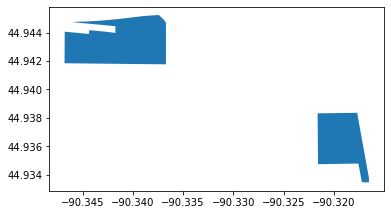

In [42]:
ab_7 = source[source['GEOID']=='55019001000007']
ab_7.plot()

<AxesSubplot:>

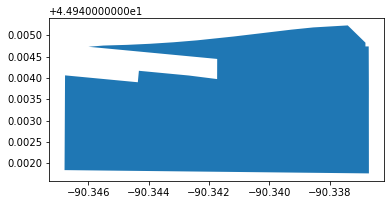

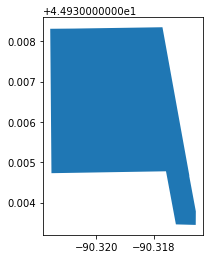

In [43]:
exploded = ab_7.explode()
exploded = exploded.reset_index(drop=True)
ab1 = exploded.loc[0:0]
ab2 = exploded.loc[1:1]
ab1.plot()
ab2.plot()

In [44]:
ab1['GEOID'] = 'Abbotsford_Colby 2'
ab2['GEOID'] = 'Abbotsford_Colby 1'

/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [45]:
source = source[source['GEOID']!='55019001000007']
source = gp.GeoDataFrame(pd.concat([ab1,ab2,source]),crs=CRS)

#### Merge the split Abbotsford 7 data two the two other wards, as determined from looking in QGIS

In [46]:
to_dissolve = source[source['GEOID'].isin(['55019161500002','Abbotsford_Colby 2'])].copy()
keep_prec = source[source['GEOID']=='55019161500002'].copy()
vals = [keep_prec[i].iloc[0] for i in non_data_cols]
vals_dict = dict(zip(non_data_cols,vals))
to_dissolve = to_dissolve.dissolve(by='CNTY_FIPS',aggfunc='sum')
to_dissolve.reset_index(inplace=True)
for k,v in vals_dict.items():
    to_dissolve[k] = str(v)
to_dissolve = to_dissolve[vest.columns]

to_dissolve2 = source[source['GEOID'].isin(['55019161750001','Abbotsford_Colby 1'])].copy()
keep_prec = source[source['GEOID']=='55019161750001'].copy()
vals = [keep_prec[i].iloc[0] for i in non_data_cols]
vals_dict = dict(zip(non_data_cols,vals))
to_dissolve2 = to_dissolve2.dissolve(by='CNTY_FIPS',aggfunc='sum')
to_dissolve2.reset_index(inplace=True)
for k,v in vals_dict.items():
    to_dissolve2[k] = str(v)
to_dissolve2 = to_dissolve2[vest.columns]

source = source[~source['GEOID'].isin(['55019161500002','55019161750001','Abbotsford_Colby 2','Abbotsford_Colby 1'])].copy()
source = gp.GeoDataFrame(pd.concat([to_dissolve,to_dissolve2,source]),crs=CRS)

In [47]:
clark_county = source[source['CNTY_NAME']=='Clark'].copy()
clark_vest = vest[vest['CNTY_NAME']=='Clark'].copy()
print('Wards in source data: ', str(len(clark_county)))
print('Wards in VEST data: ', str(len(clark_vest)))

Wards in source data:  83
Wards in VEST data:  83


### Dane County

In [48]:
dane_source = source[source['CNTY_NAME']=='Dane'].copy()
dane_vest = vest[vest['CNTY_NAME']=='Dane'].copy()
print('Wards in source data: ', str(len(dane_source)))
print('Wards in VEST data: ', str(len(dane_vest)))

Wards in source data:  446
Wards in VEST data:  444


#### After examining the specified merge from VEST's documenation in QGIS, complete the merges, remove the old wards, and add the new wards back to the dataframe.

In [49]:
to_dissolve = source[source['GEOID'].isin(['55025097750001','55025786000022'])].copy()
keep_prec = source[source['GEOID']=='55025097750001'].copy()
vals = [keep_prec[i].iloc[0] for i in non_data_cols]
vals_dict = dict(zip(non_data_cols,vals))
to_dissolve = to_dissolve.dissolve(by='CNTY_FIPS',aggfunc='sum')
to_dissolve.reset_index(inplace=True)
for k,v in vals_dict.items():
    to_dissolve[k] = str(v)
to_dissolve = to_dissolve[vest.columns]

to_dissolve2 = source[source['GEOID'].isin(['55025827500002','55025193500018'])].copy()
keep_prec = source[source['GEOID']=='55025827500002'].copy()
vals = [keep_prec[i].iloc[0] for i in non_data_cols]
vals_dict = dict(zip(non_data_cols,vals))
to_dissolve2 = to_dissolve2.dissolve(by='CNTY_FIPS',aggfunc='sum')
to_dissolve2.reset_index(inplace=True)
for k,v in vals_dict.items():
    to_dissolve2[k] = str(v)
to_dissolve2 = to_dissolve2[vest.columns]

source = source[~source['GEOID'].isin(['55025097750001','55025786000022','55025827500002','55025193500018'])].copy()
source = gp.GeoDataFrame(pd.concat([to_dissolve,to_dissolve2,source]),crs=CRS)

In [50]:
dane_source = source[source['CNTY_NAME']=='Dane'].copy()
dane_vest = vest[vest['CNTY_NAME']=='Dane'].copy()
print('Wards in source data: ', str(len(dane_source)))
print('Wards in VEST data: ', str(len(dane_vest)))

Wards in source data:  444
Wards in VEST data:  444


### Eau Claire County

In [51]:
ec_source = source[source['CNTY_NAME']=='Eau Claire'].copy()
ec_vest = vest[vest['CNTY_NAME']=='Eau Claire'].copy()
print('Wards in source data: ', str(len(ec_source)))
print('Wards in VEST data: ', str(len(ec_vest)))

Wards in source data:  128
Wards in VEST data:  127


#### After examining the specified merge from VEST's documenation in QGIS, complete the merge, remove the old wards, and add the new ward back to the dataframe.

In [52]:
to_dissolve = source[source['GEOID'].isin(['55035815500003','55035223000068'])].copy()
keep_prec = source[source['GEOID']=='55035815500003'].copy()
vals = [keep_prec[i].iloc[0] for i in non_data_cols]
vals_dict = dict(zip(non_data_cols,vals))
to_dissolve = to_dissolve.dissolve(by='CNTY_FIPS',aggfunc='sum')
to_dissolve.reset_index(inplace=True)
for k,v in vals_dict.items():
    to_dissolve[k] = str(v)
to_dissolve = to_dissolve[vest.columns]

source = source[~source['GEOID'].isin(['55035815500003','55035223000068'])].copy()
source = gp.GeoDataFrame(pd.concat([to_dissolve,source]),crs=CRS)

In [53]:
ec_source = source[source['CNTY_NAME']=='Eau Claire'].copy()
ec_vest = vest[vest['CNTY_NAME']=='Eau Claire'].copy()
print('Wards in source data: ', str(len(ec_source)))
print('Wards in VEST data: ', str(len(ec_vest)))

Wards in source data:  127
Wards in VEST data:  127


### Fond du Lac County

In [54]:
fdl_source = source[source['CNTY_NAME']=='Fond du Lac'].copy()
fdl_vest = vest[vest['CNTY_NAME']=='Fond du Lac'].copy()
print('Wards in source data: ', str(len(fdl_source)))
print('Wards in VEST data: ', str(len(fdl_vest)))

Wards in source data:  121
Wards in VEST data:  120


#### After examining the specified merge from VEST's documenation in QGIS, complete the merge, remove the old wards, and add the new ward back to the dataframe.

In [55]:
to_dissolve = source[source['GEOID'].isin(['55039262750001','55039262750028'])].copy()
keep_prec = source[source['GEOID']=='55039262750001'].copy()
vals = [keep_prec[i].iloc[0] for i in non_data_cols]
vals_dict = dict(zip(non_data_cols,vals))
to_dissolve = to_dissolve.dissolve(by='CNTY_FIPS',aggfunc='sum')
to_dissolve.reset_index(inplace=True)
for k,v in vals_dict.items():
    to_dissolve[k] = str(v)
to_dissolve = to_dissolve[vest.columns]

source = source[~source['GEOID'].isin(['55039262750001','55039262750028'])].copy()
source = gp.GeoDataFrame(pd.concat([to_dissolve,source]),crs=CRS)

In [56]:
fdl_source = source[source['CNTY_NAME']=='Fond du Lac'].copy()
fdl_vest = vest[vest['CNTY_NAME']=='Fond du Lac'].copy()
print('Wards in source data: ', str(len(fdl_source)))
print('Wards in VEST data: ', str(len(fdl_vest)))

Wards in source data:  120
Wards in VEST data:  120


### Grant County

In [57]:
grant_source = source[source['CNTY_NAME']=='Grant'].copy()
grant_vest = vest[vest['CNTY_NAME']=='Grant'].copy()
print('Wards in source data: ', str(len(grant_source)))
print('Wards in VEST data: ', str(len(grant_vest)))

Wards in source data:  91
Wards in VEST data:  92


#### Split Platteville 8 and reassign multi-polygon segments to Platteville 8 and Platteville 9 wards, after looking at the data in QGIS

In [58]:
p8 = source[source['GEOID']=='55043632500008']
display(p8)

,OBJECTID_1,OBJECTID,GEOID,MCD_FIPS,CNTY_FIPS,LSAD,NAME,ASM,SEN,CON,COUSUBFP,CNTY_NAME,STR_WARDS,PERSONS,PERSONS18,WHITE,BLACK,HISPANIC,ASIAN,AMINDIAN,PISLAND,OTHER,OTHERMLT,WHITE18,BLACK18,HISPANIC18,ASIAN18,AMINDIAN18,PISLAND18,OTHER18,OTHERMLT18,G16PRERTRU,G16PREDCLI,G16PRECCAS,G16PRELJOH,G16PREGSTE,G16PREOTH,G16USSRJOH,G16USSDFEI,G16USSLAND,G16USSOTH,geometry
3041,1962,1962,55043632500008,5504363250,55043,25,Platteville,49,17,3,63250,Grant,0008,1819,1569,1678,57,35,30,10,1,1,7,1471,40,22,24,6,1,1,4,405,481,8,101,10,18,474,481,41,0,"MULTIPOLYGON (((-90.42967 42.73649, -90.43113 ..."


In [59]:
exploded = p8.explode()
exploded = exploded.reset_index(drop=True)
display(exploded)

,OBJECTID_1,OBJECTID,GEOID,MCD_FIPS,CNTY_FIPS,LSAD,NAME,ASM,SEN,CON,COUSUBFP,CNTY_NAME,STR_WARDS,PERSONS,PERSONS18,WHITE,BLACK,HISPANIC,ASIAN,AMINDIAN,PISLAND,OTHER,OTHERMLT,WHITE18,BLACK18,HISPANIC18,ASIAN18,AMINDIAN18,PISLAND18,OTHER18,OTHERMLT18,G16PRERTRU,G16PREDCLI,G16PRECCAS,G16PRELJOH,G16PREGSTE,G16PREOTH,G16USSRJOH,G16USSDFEI,G16USSLAND,G16USSOTH,geometry
0,1962,1962,55043632500008,5504363250,55043,25,Platteville,49,17,3,63250,Grant,0008,1819,1569,1678,57,35,30,10,1,1,7,1471,40,22,24,6,1,1,4,405,481,8,101,10,18,474,481,41,0,"POLYGON ((-90.42967 42.73649, -90.43113 42.736..."
1,1962,1962,55043632500008,5504363250,55043,25,Platteville,49,17,3,63250,Grant,0008,1819,1569,1678,57,35,30,10,1,1,7,1471,40,22,24,6,1,1,4,405,481,8,101,10,18,474,481,41,0,"POLYGON ((-90.44578 42.70389, -90.44573 42.701..."


<AxesSubplot:>

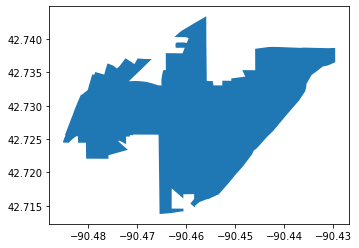

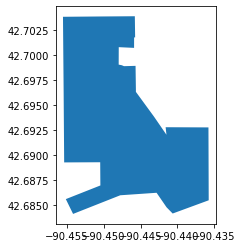

In [60]:
p8 = exploded.loc[0:0]
p9 = exploded.loc[1:1]
p8.plot()
p9.plot()

In [61]:
data_cols = [i for i in p9.columns if i not in non_data_cols]
data_cols.remove('geometry')
for i in data_cols:
    p9[i] = 0
p9['STR_WARDS'] = '0009'
p9['GEOID'] = '55043632500009'

/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


#### Remove the original Platteville 8 and merge the new Platteville 8 and 9 back to the source data

In [62]:
source = source[source['GEOID']!='55043632500008'].copy()
source = gp.GeoDataFrame(pd.concat([p8,p9,source]),crs=CRS)

In [63]:
grant_source = source[source['CNTY_NAME']=='Grant'].copy()
grant_vest = vest[vest['CNTY_NAME']=='Grant'].copy()
print('Wards in source data: ', str(len(grant_source)))
print('Wards in VEST data: ', str(len(grant_vest)))

Wards in source data:  92
Wards in VEST data:  92


### Modify Green Lake

In [64]:
gl_source = source[source['CNTY_NAME']=='Green Lake'].copy()
gl_vest = vest[vest['CNTY_NAME']=='Green Lake'].copy()
print('Wards in source data: ', str(len(gl_source)))
print('Wards in VEST data: ', str(len(gl_vest)))

Wards in source data:  39
Wards in VEST data:  38


#### After examining the specified merge from VEST's documenation in QGIS, complete the merge, remove the old wards, and add the new ward back to the dataframe. 

In [65]:
to_dissolve = source[source['GEOID'].isin(['55047101250001','55047313000004'])].copy()
keep_prec = source[source['GEOID']=='55047101250001'].copy()
vals = [keep_prec[i].iloc[0] for i in non_data_cols]
vals_dict = dict(zip(non_data_cols,vals))
to_dissolve = to_dissolve.dissolve(by='CNTY_FIPS',aggfunc='sum')
to_dissolve.reset_index(inplace=True)
for k,v in vals_dict.items():
    to_dissolve[k] = str(v)
to_dissolve = to_dissolve[vest.columns]

source = source[~source['GEOID'].isin(['55047101250001','55047313000004'])].copy()
source = gp.GeoDataFrame(pd.concat([to_dissolve,source]),crs=CRS)

In [66]:
gl_source = source[source['CNTY_NAME']=='Green Lake'].copy()
gl_vest = vest[vest['CNTY_NAME']=='Green Lake'].copy()
print('Wards in source data: ', str(len(gl_source)))
print('Wards in VEST data: ', str(len(gl_vest)))

Wards in source data:  38
Wards in VEST data:  38


### Kenosha County

In [67]:
ken_source = source[source['CNTY_NAME']=='Kenosha'].copy()
ken_vest = vest[vest['CNTY_NAME']=='Kenosha'].copy()
print('Wards in source data: ', str(len(ken_source)))
print('Wards in VEST data: ', str(len(ken_vest)))

Wards in source data:  176
Wards in VEST data:  175


#### After examining the specified merge from VEST's documenation in QGIS, complete the merge, remove the old wards, and add the new ward back to the dataframe.

In [68]:
to_dissolve = source[source['GEOID'].isin(['55059746500001','55059392250094'])].copy()
keep_prec = source[source['GEOID']=='55059746500001'].copy()
vals = [keep_prec[i].iloc[0] for i in non_data_cols]
vals_dict = dict(zip(non_data_cols,vals))
to_dissolve = to_dissolve.dissolve(by='CNTY_FIPS',aggfunc='sum')
to_dissolve.reset_index(inplace=True)
for k,v in vals_dict.items():
    to_dissolve[k] = str(v)
to_dissolve = to_dissolve[vest.columns]

source = source[~source['GEOID'].isin(['55059746500001','55059392250094'])].copy()
source = gp.GeoDataFrame(pd.concat([to_dissolve,source]),crs=CRS)

In [69]:
ken_source = source[source['CNTY_NAME']=='Kenosha'].copy()
ken_vest = vest[vest['CNTY_NAME']=='Kenosha'].copy()
print('Wards in source data: ', str(len(ken_source)))
print('Wards in VEST data: ', str(len(ken_vest)))

Wards in source data:  175
Wards in VEST data:  175


### Manitowoc County

In [70]:
man_source = source[source['CNTY_NAME']=='Manitowoc'].copy()
man_vest = vest[vest['CNTY_NAME']=='Manitowoc'].copy()
print('Wards in source data: ', str(len(man_source)))
print('Wards in VEST data: ', str(len(man_vest)))

Wards in source data:  99
Wards in VEST data:  98


#### After examining the specified merge from VEST's documenation in QGIS, complete the merge, remove the old wards, and add the new ward back to the dataframe.

In [71]:
to_dissolve = source[source['GEOID'].isin(['55071485750004','55071485000029'])].copy()
keep_prec = source[source['GEOID']=='55071485750004'].copy()
vals = [keep_prec[i].iloc[0] for i in non_data_cols]
vals_dict = dict(zip(non_data_cols,vals))
to_dissolve = to_dissolve.dissolve(by='CNTY_FIPS',aggfunc='sum')
to_dissolve.reset_index(inplace=True)
for k,v in vals_dict.items():
    to_dissolve[k] = str(v)
to_dissolve = to_dissolve[vest.columns]

source = source[~source['GEOID'].isin(['55071485750004','55071485000029'])].copy()
source = gp.GeoDataFrame(pd.concat([to_dissolve,source]),crs=CRS)

In [72]:
man_source = source[source['CNTY_NAME']=='Manitowoc'].copy()
man_vest = vest[vest['CNTY_NAME']=='Manitowoc'].copy()
print('Wards in source data: ', str(len(man_source)))
print('Wards in VEST data: ', str(len(man_vest)))

Wards in source data:  98
Wards in VEST data:  98


### Washington County

In [73]:
wash_source = source[source['CNTY_NAME']=='Washington'].copy()
wash_vest = vest[vest['CNTY_NAME']=='Washington'].copy()
print('Wards in source data: ', str(len(wash_source)))
print('Wards in VEST data: ', str(len(wash_vest)))

Wards in source data:  170
Wards in VEST data:  169


#### After examining the specified merge from VEST's documenation in QGIS, complete the merge, remove the old wards, and add the new ward back to the dataframe.

In [74]:
to_dissolve = source[source['GEOID'].isin(['55131330250005','55131744000009'])].copy()
keep_prec = source[source['GEOID']=='55131330250005'].copy()
vals = [keep_prec[i].iloc[0] for i in non_data_cols]
vals_dict = dict(zip(non_data_cols,vals))
to_dissolve = to_dissolve.dissolve(by='CNTY_FIPS',aggfunc='sum')
to_dissolve.reset_index(inplace=True)
for k,v in vals_dict.items():
    to_dissolve[k] = str(v)
to_dissolve = to_dissolve[vest.columns]

source = source[~source['GEOID'].isin(['55131330250005','55131744000009'])].copy()
source = gp.GeoDataFrame(pd.concat([to_dissolve,source]),crs=CRS)

In [75]:
wash_source = source[source['CNTY_NAME']=='Washington'].copy()
wash_vest = vest[vest['CNTY_NAME']=='Washington'].copy()
print('Wards in source data: ', str(len(wash_source)))
print('Wards in VEST data: ', str(len(wash_vest)))

Wards in source data:  169
Wards in VEST data:  169


### Outagamie County

In [76]:
out_source = source[source['CNTY_NAME']=='Outagamie'].copy()
out_vest = vest[vest['CNTY_NAME']=='Outagamie'].copy()
print('Wards in source data: ', str(len(out_source)))
print('Wards in VEST data: ', str(len(out_vest)))

Wards in source data:  199
Wards in VEST data:  197


#### After examining the specified merge from VEST's documenation in QGIS, complete the merges, remove the old wards, and add the new wards back to the dataframe.

In [77]:
to_dissolve = source[source['GEOID'].isin(['55087107500003','55087165000006'])].copy()
keep_prec = source[source['GEOID']=='55087107500003'].copy()
vals = [keep_prec[i].iloc[0] for i in non_data_cols]
vals_dict = dict(zip(non_data_cols,vals))
to_dissolve = to_dissolve.dissolve(by='CNTY_FIPS',aggfunc='sum')
to_dissolve.reset_index(inplace=True)
for k,v in vals_dict.items():
    to_dissolve[k] = str(v)
to_dissolve = to_dissolve[vest.columns]

to_dissolve2 = source[source['GEOID'].isin(['55087107500002','55087388000013'])].copy()
keep_prec = source[source['GEOID']=='55087107500002'].copy()
vals = [keep_prec[i].iloc[0] for i in non_data_cols]
vals_dict = dict(zip(non_data_cols,vals))
to_dissolve2 = to_dissolve2.dissolve(by='CNTY_FIPS',aggfunc='sum')
to_dissolve2.reset_index(inplace=True)
for k,v in vals_dict.items():
    to_dissolve2[k] = str(v)
to_dissolve2 = to_dissolve2[vest.columns]

source = source[~source['GEOID'].isin(['55087107500003','55087165000006','55087107500002','55087388000013'])].copy()
source = gp.GeoDataFrame(pd.concat([to_dissolve,to_dissolve2,source]),crs=CRS)

In [78]:
out_source = source[source['CNTY_NAME']=='Outagamie'].copy()
out_vest = vest[vest['CNTY_NAME']=='Outagamie'].copy()
print('Wards in source data: ', str(len(out_source)))
print('Wards in VEST data: ', str(len(out_vest)))

Wards in source data:  197
Wards in VEST data:  197


### Waukesha County

In [79]:
wauk_source = source[source['CNTY_NAME']=='Waukesha'].copy()
wauk_vest = vest[vest['CNTY_NAME']=='Waukesha'].copy()
print('Wards in source data: ', str(len(wauk_source)))
print('Wards in VEST data: ', str(len(wauk_vest)))

Wards in source data:  368
Wards in VEST data:  367


#### After examining the specified merge from VEST's documenation in QGIS, complete the merge, remove the old wards, and add the new ward back to the dataframe.

In [80]:
to_dissolve = source[source['GEOID'].isin(['55133448500002','55133787500010'])].copy()
keep_prec = source[source['GEOID']=='55133448500002'].copy()
vals = [keep_prec[i].iloc[0] for i in non_data_cols]
vals_dict = dict(zip(non_data_cols,vals))
to_dissolve = to_dissolve.dissolve(by='CNTY_FIPS',aggfunc='sum')
to_dissolve.reset_index(inplace=True)
for k,v in vals_dict.items():
    to_dissolve[k] = str(v)
to_dissolve = to_dissolve[vest.columns]

source = source[~source['GEOID'].isin(['55133448500002','55133787500010'])].copy()
source = gp.GeoDataFrame(pd.concat([to_dissolve,source]),crs=CRS)

In [81]:
wauk_source = source[source['CNTY_NAME']=='Waukesha'].copy()
wauk_vest = vest[vest['CNTY_NAME']=='Waukesha'].copy()
print('Wards in source data: ', str(len(wauk_source)))
print('Wards in VEST data: ', str(len(wauk_vest)))

Wards in source data:  367
Wards in VEST data:  367


### Winnebago County

From VEST's documentation:

Several thousand votes were reported for the town of Menasha, which had almost entirely been incorporated into the village of Fox Crossing. The ward numbers in the Menasha results matched exactly the wards in Fox Crossing that didn't report any results, so the Menasha results were applied to Fox Crossing.

In [82]:
win_source = source[source['CNTY_NAME']=='Winnebago'].copy()
win_vest = vest[vest['CNTY_NAME']=='Winnebago'].copy()
print('Wards in source data: ', str(len(win_source)))
print('Wards in VEST data: ', str(len(win_vest)))

Wards in source data:  192
Wards in VEST data:  185


#### After examining the specified merge from VEST's documenation in QGIS, complete the merges, remove the old wards, and add the new wards back to the dataframe. There are two extra wards in the source data that are unaccounted for (Fox Crossing and Menasha 8, and Fox Crossing and Menasha 9). The Fox Crossing and Menasah wards are thus merged together (Menasha 8 and Fox Crossing 8; Menasha 9 and Fox Crossing 9 -- see to_dissolve3 and to_dissolve4)

In [91]:
source.loc[source["GEOID"]=='55139508500009']

,OBJECTID_1,OBJECTID,GEOID,MCD_FIPS,CNTY_FIPS,LSAD,NAME,ASM,SEN,CON,COUSUBFP,CNTY_NAME,STR_WARDS,PERSONS,PERSONS18,WHITE,BLACK,HISPANIC,ASIAN,AMINDIAN,PISLAND,OTHER,OTHERMLT,WHITE18,BLACK18,HISPANIC18,ASIAN18,AMINDIAN18,PISLAND18,OTHER18,OTHERMLT18,G16PRERTRU,G16PREDCLI,G16PRECCAS,G16PRELJOH,G16PREGSTE,G16PREOTH,G16USSRJOH,G16USSDFEI,G16USSLAND,G16USSOTH,geometry
6657,6658,6657,55139508500009,5513950850,55139,43,Menasha,57,19,6,50850,Winnebago,0009,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,823,11,81,15,25,1009,759,83,2,"POLYGON ((-88.43333 44.24415, -88.42935 44.244..."


In [92]:
to_dissolve = source[source['GEOID'].isin(['55139269820010','55139508250039'])].copy()
keep_prec = source[source['GEOID']=='55139269820010'].copy()
vals = [keep_prec[i].iloc[0] for i in non_data_cols]
vals_dict = dict(zip(non_data_cols,vals))
to_dissolve = to_dissolve.dissolve(by='CNTY_FIPS',aggfunc='sum')
to_dissolve.reset_index(inplace=True)
for k,v in vals_dict.items():
    to_dissolve[k] = str(v)
to_dissolve = to_dissolve[vest.columns]
to_dissolve['GEOID']= '55139508500010'

to_dissolve2 = source[source['GEOID'].isin(['55139557750003','55139557500026'])].copy()
keep_prec = source[source['GEOID']=='55139557750003'].copy()
vals = [keep_prec[i].iloc[0] for i in non_data_cols]
vals_dict = dict(zip(non_data_cols,vals))
to_dissolve2 = to_dissolve2.dissolve(by='CNTY_FIPS',aggfunc='sum')
to_dissolve2.reset_index(inplace=True)
for k,v in vals_dict.items():
    to_dissolve2[k] = str(v)
to_dissolve2 = to_dissolve2[vest.columns]

to_dissolve3 = source[source['GEOID'].isin(['55139508500009','55139269820009'])].copy()
keep_prec = source[source['GEOID']=='55139508500009'].copy()
vals = [keep_prec[i].iloc[0] for i in non_data_cols]
vals_dict = dict(zip(non_data_cols,vals))
to_dissolve3 = to_dissolve3.dissolve(by='CNTY_FIPS',aggfunc='sum')
to_dissolve3.reset_index(inplace=True)
for k,v in vals_dict.items():
    to_dissolve3[k] = str(v)
to_dissolve3 = to_dissolve3[vest.columns]

to_dissolve4 = source[source['GEOID'].isin(['55139508500013','55139269820013'])].copy()
keep_prec = source[source['GEOID']=='55139508500013'].copy()
vals = [keep_prec[i].iloc[0] for i in non_data_cols]
vals_dict = dict(zip(non_data_cols,vals))
to_dissolve4 = to_dissolve4.dissolve(by='CNTY_FIPS',aggfunc='sum')
to_dissolve4.reset_index(inplace=True)
for k,v in vals_dict.items():
    to_dissolve4[k] = str(v)
to_dissolve4 = to_dissolve4[vest.columns]

to_dissolve5 = source[source['GEOID'].isin(['55139269820008','55139508250040','55139508250041','55139508250042'])].copy()
keep_prec = source[source['GEOID']=='55139269820008'].copy()
vals = [keep_prec[i].iloc[0] for i in non_data_cols]
vals_dict = dict(zip(non_data_cols,vals))
to_dissolve5 = to_dissolve5.dissolve(by='CNTY_FIPS',aggfunc='sum')
to_dissolve5.reset_index(inplace=True)
for k,v in vals_dict.items():
    to_dissolve5[k] = str(v)
to_dissolve5 = to_dissolve5[vest.columns]
to_dissolve5['GEOID'] = '55139508500008'

source = source[~source['GEOID'].isin(['55139269820008','55139508500013','55139269820013' ,'55139508500009','55139269820009','55139269820010','55139508250039','55139508250040','55139508250041','55139508250042','55139557750003','55139557500026'])].copy()
source = gp.GeoDataFrame(pd.concat([to_dissolve5,to_dissolve,to_dissolve2,to_dissolve3,to_dissolve4,source]),crs=CRS)

In [93]:
win_source = source[source['CNTY_NAME']=='Winnebago'].copy()
win_vest = vest[vest['CNTY_NAME']=='Winnebago'].copy()
print('Wards in source data: ', str(len(win_source)))
print('Wards in VEST data: ', str(len(win_vest)))

Wards in source data:  185
Wards in VEST data:  185


### Waupaca County

In [94]:
wau_source = source[source['CNTY_NAME']=='Waupaca'].copy()
wau_vest = vest[vest['CNTY_NAME']=='Waupaca'].copy()
print('Wards in source data: ', str(len(wau_source)))
print('Wards in VEST data: ', str(len(wau_vest)))

Wards in source data:  98
Wards in VEST data:  96


#### After examining the specified merge from VEST's documenation in QGIS, complete the merge, remove the old wards, and add the new ward back to the dataframe.

In [95]:
to_dissolve = source[source['GEOID'].isin(['55135426500001','55135157250009','55135157250010'])].copy()
keep_prec = source[source['GEOID']=='55135426500001'].copy()
vals = [keep_prec[i].iloc[0] for i in non_data_cols]
vals_dict = dict(zip(non_data_cols,vals))
to_dissolve = to_dissolve.dissolve(by='CNTY_FIPS',aggfunc='sum')
to_dissolve.reset_index(inplace=True)
for k,v in vals_dict.items():
    to_dissolve[k] = str(v)
to_dissolve = to_dissolve[vest.columns]

source = source[~source['GEOID'].isin(['55135426500001','55135157250009','55135157250010'])].copy()
source = gp.GeoDataFrame(pd.concat([to_dissolve,source]),crs=CRS)

In [96]:
wau_source = source[source['CNTY_NAME']=='Waupaca'].copy()
wau_vest = vest[vest['CNTY_NAME']=='Waupaca'].copy()
print('Wards in source data: ', str(len(wau_source)))
print('Wards in VEST data: ', str(len(wau_vest)))

Wards in source data:  96
Wards in VEST data:  96


### La Crosse County

In [97]:
lc_source = source[source['CNTY_NAME']=='La Crosse'].copy()
lc_vest = vest[vest['CNTY_NAME']=='La Crosse'].copy()
print('Wards in source data: ', str(len(lc_source)))
print('Wards in VEST data: ', str(len(lc_vest)))

Wards in source data:  109
Wards in VEST data:  109


#### Although there are the same number of wards, there is one merge and one split that need to be completed, per VEST's documentation. After examining the specified merge from VEST's documenation in QGIS, complete the merge, remove the old wards, and add the new ward back to the dataframe.

In [98]:
to_dissolve = source[source['GEOID'].isin(['55063599500001','55063354500012'])].copy()
keep_prec = source[source['GEOID']=='55063599500001'].copy()
vals = [keep_prec[i].iloc[0] for i in non_data_cols]
vals_dict = dict(zip(non_data_cols,vals))
to_dissolve = to_dissolve.dissolve(by='CNTY_FIPS',aggfunc='sum')
to_dissolve.reset_index(inplace=True)
for k,v in vals_dict.items():
    to_dissolve[k] = str(v)
to_dissolve = to_dissolve[vest.columns]

source = source[~source['GEOID'].isin(['55063599500001','55063354500012'])].copy()
source = gp.GeoDataFrame(pd.concat([to_dissolve,source]),crs=CRS)

#### Subset Holmen 2, as it needs to be split from a multi-polygon into two singular polygons (Holmen 2 and Holland 1)

In [99]:
holmen2 = source[source['GEOID']=='55063354500002'].copy()
display(holmen2)

,OBJECTID_1,OBJECTID,GEOID,MCD_FIPS,CNTY_FIPS,LSAD,NAME,ASM,SEN,CON,COUSUBFP,CNTY_NAME,STR_WARDS,PERSONS,PERSONS18,WHITE,BLACK,HISPANIC,ASIAN,AMINDIAN,PISLAND,OTHER,OTHERMLT,WHITE18,BLACK18,HISPANIC18,ASIAN18,AMINDIAN18,PISLAND18,OTHER18,OTHERMLT18,G16PRERTRU,G16PREDCLI,G16PRECCAS,G16PRELJOH,G16PREGSTE,G16PREOTH,G16USSRJOH,G16USSDFEI,G16USSLAND,G16USSOTH,geometry
3684,2605,2605,55063354500002,5506335450,55063,47,Holmen,94,32,3,35450,La Crosse,0002,1141,820,1046,15,7,66,6,1,0,0,775,6,3,34,2,0,0,0,271,277,3,23,6,6,272,287,21,0,"MULTIPOLYGON (((-91.27288 43.97377, -91.27286 ..."


In [100]:
exploded = holmen2.explode()
exploded = exploded.reset_index(drop=True)
display(exploded)

,OBJECTID_1,OBJECTID,GEOID,MCD_FIPS,CNTY_FIPS,LSAD,NAME,ASM,SEN,CON,COUSUBFP,CNTY_NAME,STR_WARDS,PERSONS,PERSONS18,WHITE,BLACK,HISPANIC,ASIAN,AMINDIAN,PISLAND,OTHER,OTHERMLT,WHITE18,BLACK18,HISPANIC18,ASIAN18,AMINDIAN18,PISLAND18,OTHER18,OTHERMLT18,G16PRERTRU,G16PREDCLI,G16PRECCAS,G16PRELJOH,G16PREGSTE,G16PREOTH,G16USSRJOH,G16USSDFEI,G16USSLAND,G16USSOTH,geometry
0,2605,2605,55063354500002,5506335450,55063,47,Holmen,94,32,3,35450,La Crosse,0002,1141,820,1046,15,7,66,6,1,0,0,775,6,3,34,2,0,0,0,271,277,3,23,6,6,272,287,21,0,"POLYGON ((-91.27288 43.97377, -91.27286 43.971..."
1,2605,2605,55063354500002,5506335450,55063,47,Holmen,94,32,3,35450,La Crosse,0002,1141,820,1046,15,7,66,6,1,0,0,775,6,3,34,2,0,0,0,271,277,3,23,6,6,272,287,21,0,"POLYGON ((-91.27616 43.96290, -91.27611 43.959..."


<AxesSubplot:>

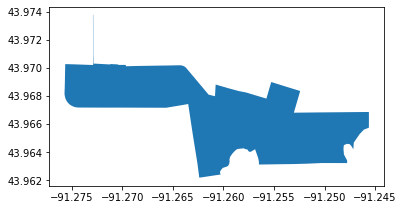

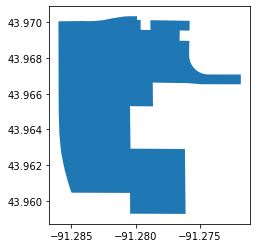

In [101]:
holmen2 = exploded.loc[0:0]
holland = exploded.loc[1:1]
holmen2.plot()
holland.plot()

In [102]:
holland['MCD_FIPS'] = '5506335350'
holland['STR_WARDS'] = '0001'
holland['GEOID'] = '55063353500001'
holland = gp.GeoDataFrame(holland,crs=CRS)

/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


#### Remove the original Holmen 2 ward from the source data

In [103]:
source = source[source['GEOID']!='55063354500002'].copy()

#### VEST states that they used WI LTSB's documentation for assigning votes to Holland 1 from Holmen 2. See documentation here under "Disaggregation of Election Data": https://www.arcgis.com/home/item.html?id=fab48cb129b34f82b8afe66f87203920 

#### Get 2010 block data and shapefile from the Census API

In [104]:
def get_and_unzip(url, data_dir=os.getcwd()): #os.getcwd() puts the data_dir default as the current working directory
    basename = url.split("/")[-1] #gets the name of what will be the file and downloads it
    name_with_path = os.path.join(data_dir, basename) #appends basename to the set working directory to know where the downloaded is housed
    if not os.path.exists(name_with_path): #if the the data does does not exist in the directory, 
        #print('url: ' + url)
    
        file_data = urlopen(url, context=ssl.create_default_context(cafile=certifi.where()))
        data_to_write = file_data.read()
        with open(name_with_path, "wb") as f:
            f.write(data_to_write)

        zip_obj = ZipFile(name_with_path) #recognizes data downloaded as a zip file
        zip_obj.extractall(data_dir) #extracts zipped data
        del(zip_obj) #deletes the zipped folder

variables = [
    "P005001"]
keys = [
    "TOTPOP"]

variables_dict = dict(zip(keys,variables))

def get_block_data(fip, co_fip, CENSUS_API_KEY, variables_dict=variables_dict):
    HOST = "https://api.census.gov/data"
    # set year for data and acs5 or sf1 (sf1 stands for summary file 1)
    # as of July, 2018 - documentation can be found
    # here: https://www.socialexplorer.com/data/C2010/metadata/?ds=SF1
    year = "2010"
    dataset = "dec/sf1"
    base_url = "/".join([HOST, year, dataset])
    # The variables we want are NAME and total population
    #get_variables = ["NAME", "P001001"]   
    data = []
    counties_fips = [co_fip]
    for county in counties_fips:
   # for county_code in state_county_dict[fip]:
        predicates = {}
        predicates["get"] = ",".join(variables_dict.values())
        predicates["for"] = "block:*"
        predicates["in"] = "state:" + fip + "+county:" + county[2:]
        predicates["key"] = CENSUS_API_KEY
        # Write the result to a response object:
        response = requests.get(base_url, params=predicates)
        col_names = response.json()[0]        
        data = data + response.json()[1:]
        #print("found data for: " + county + "!")
    print('done collecting data')
    geoids = []  # initialize geoid vector
    pop_blocks = pd.DataFrame(columns=col_names, data=data)
    pop_blocks.rename(columns={variables_dict[key]: key for key in variables_dict}, inplace=True)
    cols = [i for i in pop_blocks.columns if i not in ["NAME","state","county","tract","block"]]
    #print("columns that should be numeric: ", cols)
    for col in cols:
        pop_blocks[col]=pd.to_numeric(pop_blocks[col])
    for index, row in pop_blocks.iterrows():
        # make changes here for tracts
        geoid = row["state"] + row["county"] + row["tract"] + row["block"]
        geoids.append(geoid)
    pop_blocks["GEOID10"] = geoids
    pop_blocks.set_index(["state", "county", "tract"],
                         drop=False, inplace=True)

    print("starting to retrieve blocks")
    url_block = "https://www2.census.gov/geo/tiger/" \
                "TIGER2010/TABBLOCK/2010/tl_2010_" + fip + "_tabblock10.zip"
    get_and_unzip(url_block, os.getcwd())
    print('done unzipping')
    shp_blocks = gp.read_file("tl_2010_" + fip + "_tabblock10.shp")
    print('starting merge of data and geography')
    blocks = pd.merge(shp_blocks, pop_blocks, on="GEOID10")
    os.remove("tl_2010_" + fip + "_tabblock10.zip")
    os.remove("tl_2010_" + fip + "_tabblock10.dbf")
    os.remove("tl_2010_" + fip + "_tabblock10.prj")
    os.remove("tl_2010_" + fip + "_tabblock10.shp.xml")
    os.remove("tl_2010_" + fip + "_tabblock10.shp")
    os.remove("tl_2010_" + fip + "_tabblock10.shx")

    print('function complete')
    return blocks

In [105]:
block_pop = get_block_data('55', '55063','ef8d7d2d71226a4e4f86b6ee741c8d8f979d6c7b')
block_pop = block_pop.to_crs(CRS)

done collecting data
starting to retrieve blocks
done unzipping
starting merge of data and geography
function complete


#### Plot the La Crosse blocks and wards to ensure data is looking correct

<AxesSubplot:>

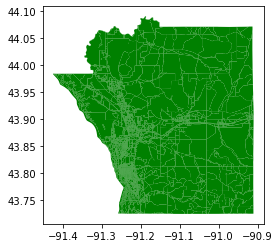

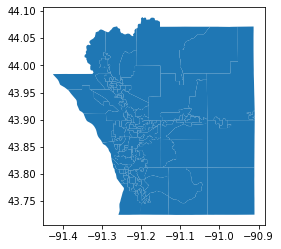

In [106]:
block_pop.plot(color='green')
lc_source = gp.GeoDataFrame(lc_source,crs=CRS)
lc_source.plot()

In [107]:
block_pop.head(1)

,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,UR10,UACE10,UATYP10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry,TOTPOP,state,county,tract,block
0,55,063,010300,2012,550630103002012,Block 2012,G5040,U,45910,U,S,2012,0,+43.8656328,-091.2604149,"POLYGON ((-91.25986 43.86576, -91.25986 43.865...",0,55,063,010300,2012


<AxesSubplot:>

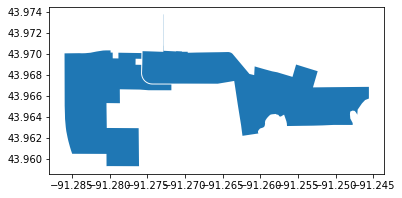

In [108]:
holmen_holland = exploded
holmen_holland.plot()

#### Subset the La Crosse county block data by intersecting it with Holmen 2 and Holland 1

<AxesSubplot:>

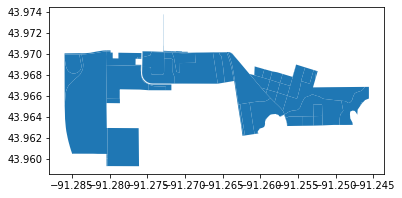

In [109]:
block_pop_sub = gp.overlay(holmen_holland,block_pop,how='intersection')
block_pop_sub.head(1)
block_pop_sub.plot()

#### Get the total 2010 population of Holmen 2 and Holland 1

In [110]:
block_pop_tot_sum = block_pop_sub['TOTPOP'].sum()
print(block_pop_tot_sum)

2336


#### Get the 2010 population of Holmen 2 and Holland 1, respectively, by performing another intersection

In [111]:
block_pop_holmen2 = gp.overlay(holmen2,block_pop_sub,how='intersection')
block_sum_holmen2 = block_pop_holmen2['TOTPOP'].sum()
print('Holmen 2 2010 population: ', block_sum_holmen2)
block_sum_holland = block_pop_tot_sum-block_sum_holmen2
print('Holland 1 2010 population: ', block_sum_holland)

Holmen 2 2010 population:  1857
Holland 1 2010 population:  479


#### Calculate a ratio for each of Holmen 2 and Holland 1, given their 2010 populations to the two precincts total 2010 population

In [112]:
holland_ratio = block_sum_holland/block_pop_tot_sum
holmen2_ratio = block_sum_holmen2/block_pop_tot_sum
print('Holland 1 ratio: ', holland_ratio)
print('Holmen 2 ratio: ', holmen2_ratio)

Holland 1 ratio:  0.2050513698630137
Holmen 2 ratio:  0.7949486301369864


#### Reassign Holmen 2's election values to each Holmen 2 and Holland 1 based on the ratios calculated, and merge them back with the source data

In [113]:
data_cols = [i for i in vest.columns if i not in non_data_cols]
data_cols.remove('geometry')
for i in data_cols:
    holmen2[i] = holmen2[i].apply(lambda x: x*holmen2_ratio)
for i in data_cols:
    holland[i] = holland[i].apply(lambda x: x*holland_ratio)

/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [114]:
'''This function takes in the original and rounded values and returns the error rate.
Inputs: actual and rounded (int)
Output: Error'''
def error_gen(actual, rounded):
    divisor = sqrt(1.0 if actual < 1.0 else actual)
    return abs(rounded - actual) ** 2 / divisor

'''This function take in a list of votes as floats and the target sum and then returns the rounded list.
Inputs: list of floats, target sum
Outputs: rounded list (int) to target sum'''
def round_to_target(float_vote, target_sum):
    if all(v == 0 for v in float_vote) and target_sum != 0:
        float_vote[0] = target_sum
    n = len(float_vote)
    rounded = [int(x) for x in float_vote]
    up_count = int(target_sum) - sum(rounded)
    errors = [(error_gen(float_vote[i], rounded[i] + 1) - error_gen(float_vote[i], rounded[i]), i) for i in range(n)]
    rank = sorted(errors)
    for i in range(up_count):
        rounded[rank[i][1]] += 1
    return list(rounded)

In [115]:
for i in data_cols:
    all_wards_colvals = list(list(holmen2[i]) + list(holland[i]))
    tot_sum = holmen2[i].sum() + holland[i].sum()
    rounded_i = round_to_target(all_wards_colvals,tot_sum)
    holmen2_vals = rounded_i[0]
    holland_vals = rounded_i[1]
    holmen2[i] = holmen2_vals
    holland[i] = holland_vals
    

In [116]:
source = gp.GeoDataFrame(pd.concat([holmen2,holland,source]),crs=CRS)

In [117]:
lc_source = source[source['CNTY_NAME']=='La Crosse'].copy()
lc_vest = vest[vest['CNTY_NAME']=='La Crosse'].copy()
print('Wards in source data: ', str(len(lc_source)))
print('Wards in VEST data: ', str(len(lc_vest)))

Wards in source data:  109
Wards in VEST data:  109


### Jefferson County

In [118]:
jeff_source = source[source['CNTY_NAME']=='Jefferson'].copy()
jeff_vest = vest[vest['CNTY_NAME']=='Jefferson'].copy()
print('Wards in source data: ', str(len(jeff_source)))
print('Wards in VEST data: ', str(len(jeff_vest)))

Wards in source data:  99
Wards in VEST data:  99


#### Rename the ward as specified in VEST's documentation

In [119]:
vest_jeff_ids = list(jeff_vest['GEOID'])
source_jeff_ids = list(jeff_source['GEOID'])

diff_ids = set(set(vest_jeff_ids) ^ set(source_jeff_ids))
print(diff_ids)

{'55055839750019', '55055839750003'}


In [120]:
source['GEOID'] = source['GEOID'].apply(lambda x: x.replace('55055839750003','55055839750019'))

In [121]:
jeff_source = source[source['CNTY_NAME']=='Jefferson'].copy()
jeff_vest = vest[vest['CNTY_NAME']=='Jefferson'].copy()
vest_jeff_ids = list(jeff_vest['GEOID'])
source_jeff_ids = list(jeff_source['GEOID'])

diff_ids = set(set(vest_jeff_ids) ^ set(source_jeff_ids))
print(diff_ids)

set()


### Check County precinct differences again

In [122]:
dict_source = subset_county(source,'CNTY_NAME')
dict_vest = subset_county(vest,'CNTY_NAME')

for k,v in dict_source.items():
    for i,j in dict_vest.items():
        if k == i:
            if len(v) == len(j):
                continue
            else:
                print(k.upper(), ' HAS DIFFERENT NUMBER OF PRECINCTS IN VEST AND SOURCE.')
                print('SOURCE has ', len(v), ' precincts.')
                print('VEST has ', len(j), ' precicnts.')
            print('------------------------------------------------------------------')
        else:
            continue

### Validate Election Results - Precinct-by-Precinct

#### Confirm Unique IDs

In [123]:
print('Are GEOIDs in source unique? ', str(len(source)==len(source['GEOID'].unique())))
print('Are GEOIDs in VEST unique? ', str(len(vest)==len(vest['GEOID'].unique())))

Are GEOIDs in source unique?  True
Are GEOIDs in VEST unique?  True


#### Attempt to join the data

In [124]:
join_attempt_1 = pd.merge(source,vest,how="outer",on="GEOID",indicator=True)
print(join_attempt_1["_merge"].value_counts())

both          6870
left_only        2
right_only       2
Name: _merge, dtype: int64


In [125]:
source_only = join_attempt_1[join_attempt_1["_merge"]=="left_only"]
vest_only = join_attempt_1[join_attempt_1["_merge"]=="right_only"]
source_only_uniqueIDs = list(source_only['GEOID'])
vest_only_uniqueIDs = list(vest_only['GEOID'])
display(source_only)
display(vest_only)

,OBJECTID_1_x,OBJECTID_x,GEOID,MCD_FIPS_x,CNTY_FIPS_x,LSAD_x,NAME_x,ASM_x,SEN_x,CON_x,COUSUBFP_x,CNTY_NAME_x,STR_WARDS_x,PERSONS_x,PERSONS18_x,WHITE_x,BLACK_x,HISPANIC_x,ASIAN_x,AMINDIAN_x,PISLAND_x,OTHER_x,OTHERMLT_x,WHITE18_x,BLACK18_x,HISPANIC18_x,ASIAN18_x,AMINDIAN18_x,PISLAND18_x,OTHER18_x,OTHERMLT18_x,G16PRERTRU_x,G16PREDCLI_x,G16PRECCAS_x,G16PRELJOH_x,G16PREGSTE_x,G16PREOTH_x,G16USSRJOH_x,G16USSDFEI_x,G16USSLAND_x,G16USSOTH_x,geometry_x,OBJECTID_1_y,OBJECTID_y,MCD_FIPS_y,CNTY_FIPS_y,LSAD_y,NAME_y,ASM_y,SEN_y,CON_y,COUSUBFP_y,CNTY_NAME_y,STR_WARDS_y,PERSONS_y,PERSONS18_y,WHITE_y,BLACK_y,HISPANIC_y,ASIAN_y,AMINDIAN_y,PISLAND_y,OTHER_y,OTHERMLT_y,WHITE18_y,BLACK18_y,HISPANIC18_y,ASIAN18_y,AMINDIAN18_y,PISLAND18_y,OTHER18_y,OTHERMLT18_y,G16PRERTRU_y,G16PREDCLI_y,G16PRECCAS_y,G16PRELJOH_y,G16PREGSTE_y,G16PREOTH_y,G16USSRJOH_y,G16USSDFEI_y,G16USSLAND_y,G16USSOTH_y,geometry_y,_merge
6601,6616,6615,55139269820011,5513926982,55139,47,Fox Crossing,0,0,0,26982,Winnebago,0011,1821.0,1374.0,1159.0,101.0,366.0,151.0,31.0,0.0,6.0,7.0,980.0,54.0,216.0,90.0,24.0,0.0,4.0,6.0,316.0,226.0,2.0,31.0,5.0,7.0,350.0,217.0,21.0,0.0,"MULTIPOLYGON (((-88.40910 44.23913, -88.40960 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,left_only
6602,6617,6616,55139269820012,5513926982,55139,47,Fox Crossing,0,0,0,26982,Winnebago,0012,1711.0,1397.0,1521.0,21.0,104.0,53.0,12.0,0.0,0.0,0.0,1278.0,12.0,66.0,31.0,10.0,0.0,0.0,0.0,297.0,211.0,2.0,29.0,5.0,6.0,330.0,203.0,20.0,0.0,"MULTIPOLYGON (((-88.40652 44.23437, -88.40456 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,left_only


,OBJECTID_1_x,OBJECTID_x,GEOID,MCD_FIPS_x,CNTY_FIPS_x,LSAD_x,NAME_x,ASM_x,SEN_x,CON_x,COUSUBFP_x,CNTY_NAME_x,STR_WARDS_x,PERSONS_x,PERSONS18_x,WHITE_x,BLACK_x,HISPANIC_x,ASIAN_x,AMINDIAN_x,PISLAND_x,OTHER_x,OTHERMLT_x,WHITE18_x,BLACK18_x,HISPANIC18_x,ASIAN18_x,AMINDIAN18_x,PISLAND18_x,OTHER18_x,OTHERMLT18_x,G16PRERTRU_x,G16PREDCLI_x,G16PRECCAS_x,G16PRELJOH_x,G16PREGSTE_x,G16PREOTH_x,G16USSRJOH_x,G16USSDFEI_x,G16USSLAND_x,G16USSOTH_x,geometry_x,OBJECTID_1_y,OBJECTID_y,MCD_FIPS_y,CNTY_FIPS_y,LSAD_y,NAME_y,ASM_y,SEN_y,CON_y,COUSUBFP_y,CNTY_NAME_y,STR_WARDS_y,PERSONS_y,PERSONS18_y,WHITE_y,BLACK_y,HISPANIC_y,ASIAN_y,AMINDIAN_y,PISLAND_y,OTHER_y,OTHERMLT_y,WHITE18_y,BLACK18_y,HISPANIC18_y,ASIAN18_y,AMINDIAN18_y,PISLAND18_y,OTHER18_y,OTHERMLT18_y,G16PRERTRU_y,G16PREDCLI_y,G16PRECCAS_y,G16PRELJOH_y,G16PREGSTE_y,G16PREOTH_y,G16USSRJOH_y,G16USSDFEI_y,G16USSLAND_y,G16USSOTH_y,geometry_y,_merge
6872,NaN,NaN,55139508500011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,6616.0,6615.0,5513950850,55139,47,Menasha,57,19,6,26982,Winnebago,0011,1821.0,1374.0,1159.0,101.0,366.0,151.0,31.0,0.0,6.0,7.0,980.0,54.0,216.0,90.0,24.0,0.0,4.0,6.0,321.0,360.0,3.0,33.0,9.0,17.0,341.0,338.0,44.0,2.0,"MULTIPOLYGON (((-88.40910 44.23913, -88.40960 ...",right_only
6873,NaN,NaN,55139508500012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,6617.0,6616.0,5513950850,55139,47,Menasha,57,19,6,26982,Winnebago,0012,1711.0,1397.0,1521.0,21.0,104.0,53.0,12.0,0.0,0.0,0.0,1278.0,12.0,66.0,31.0,10.0,0.0,0.0,0.0,302.0,339.0,3.0,31.0,9.0,15.0,321.0,318.0,41.0,2.0,"MULTIPOLYGON (((-88.40652 44.23437, -88.40456 ...",right_only


#### Rename the GEOIDs for Fox Crossing/Menasha as specified in VEST's documentation

In [126]:
replace_dict = {'55139269820011':'55139508500011','55139269820012':'55139508500012'}

source['GEOID'] = source['GEOID'].apply(lambda x: replace_dict.get(x) if str(x) in replace_dict.keys() else x)

#### Join Attempt 2

In [127]:
join_attempt_2 = pd.merge(source,vest,how="outer",on="GEOID",indicator=True)
print(join_attempt_2["_merge"].value_counts())

both          6872
left_only        0
right_only       0
Name: _merge, dtype: int64


In [128]:
def validater_row (df, column_List,join_col, allowed_diff):
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    for j in range(0,len(df.index)):
        same = True
        for i in column_List:
            left_Data = i + "_x"
            right_Data = i + "_y"
            diff = abs(df.iloc[j][left_Data]-df.iloc[j][right_Data])
            if(diff > allowed_diff):
                if(diff>allowed_diff):
                    print(i, "{:.>72}".format(df.iloc[j][join_col]), "(S)","{:.>5}".format(int(df.iloc[j][left_Data]))," (V){:.>5}".format(int(df.iloc[j][right_Data])),"(D):{:>5}".format(int(df.iloc[j][right_Data])-int(df.iloc[j][left_Data])))           
                #print(df.iloc[j]['countypct'])
                
                diff_values.append(abs(diff))
                same = False
                if(np.isnan(diff)):
                    print("NaN value at diff is: ", df.iloc[j][join_col])
                    print(df.iloc[j][left_Data])
                    print(df.iloc[j][right_Data])
                if (diff>max_diff):
                    max_diff = diff
                    #print("New max diff is: ", str(max_diff))
                    #print(df.iloc[j]['cty_pct'])
        if(same != True):
            different_rows +=1
            diff_list.append(df.iloc[j][join_col])
        else:
            matching_rows +=1
    print("")
    print("There are ", len(df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    #count_big_diff = len([i for i in diff_values if i > 10])
    #print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    diff_list.sort()
    print(diff_list)

In [129]:
elec_cols = ['G16PRERTRU', 'G16PREDCLI', 'G16PRECCAS', 'G16PRELJOH',
       'G16PREGSTE', 'G16PREOTH', 'G16USSRJOH', 'G16USSDFEI', 'G16USSLAND',
       'G16USSOTH']

#Run the validater with a threshold of 0
validater_row(join_attempt_2,elec_cols,'GEOID',0)

G16PRERTRU ..........................................................55063354500002 (S) ..215  (V)..245 (D):   30
G16PREDCLI ..........................................................55063354500002 (S) ..220  (V)..250 (D):   30
G16PRECCAS ..........................................................55063354500002 (S) ....2  (V)....3 (D):    1
G16PRELJOH ..........................................................55063354500002 (S) ...18  (V)...21 (D):    3
G16PREGSTE ..........................................................55063354500002 (S) ....5  (V)....6 (D):    1
G16PREOTH ..........................................................55063354500002 (S) ....5  (V)....7 (D):    2
G16USSRJOH ..........................................................55063354500002 (S) ..216  (V)..246 (D):   30
G16USSDFEI ..........................................................55063354500002 (S) ..228  (V)..259 (D):   31
G16USSLAND ..........................................................55063354500002 (S) .

G16PRERTRU ..........................................................55139269820001 (S) ..208  (V)..355 (D):  147
G16PREDCLI ..........................................................55139269820001 (S) ..151  (V)..253 (D):  102
G16PRECCAS ..........................................................55139269820001 (S) ....3  (V)....5 (D):    2
G16PRELJOH ..........................................................55139269820001 (S) ...20  (V)...36 (D):   16
G16PREGSTE ..........................................................55139269820001 (S) ....5  (V)....7 (D):    2
G16PREOTH ..........................................................55139269820001 (S) ....8  (V)...10 (D):    2
G16USSRJOH ..........................................................55139269820001 (S) ..232  (V)..393 (D):  161
G16USSDFEI ..........................................................55139269820001 (S) ..144  (V)..243 (D):   99
G16USSLAND ..........................................................55139269820001 (S) .


There are  6872  total rows
30  of these rows have election result differences
6842  of these rows are the same

The max difference between any one shared column in a row is:  896
The average difference is:  55.80408163265306
['55063353500001', '55063353500002', '55063353500003', '55063353500004', '55063353500005', '55063353500006', '55063354500001', '55063354500002', '55063354500003', '55063354500004', '55063354500005', '55063354500006', '55063354500007', '55063354500008', '55063354500009', '55063354500010', '55063354500011', '55139269820001', '55139269820002', '55139269820003', '55139269820004', '55139269820005', '55139269820006', '55139269820007', '55139508500008', '55139508500009', '55139508500010', '55139508500011', '55139508500012', '55139508500013']


#### Examine the discrepencies by county

In [130]:
diff_geoids = ['55063353500001', '55063353500002', '55063353500003', '55063353500004', '55063353500005', '55063353500006', '55063354500001', '55063354500002', '55063354500003', '55063354500004', '55063354500005', '55063354500006', '55063354500007', '55063354500008', '55063354500009', '55063354500010', '55063354500011', '55139269820001', '55139269820002', '55139269820003', '55139269820004', '55139269820005', '55139269820006', '55139269820007', '55139508500008', '55139508500009', '55139508500010', '55139508500011', '55139508500012', '55139508500013']
source_not_matching = source[source['GEOID'].isin(diff_geoids)]
not_matching_cos = list(source_not_matching['CNTY_NAME'].unique())
print(not_matching_cos)

['La Crosse', 'Winnebago']


In looking at the totals on the WI website, it seems as if our totals are correct: https://elections.wi.gov/elections-voting/results/2016/fall-general for the La Crosse totals, and VEST is closer (but not exactly matching the Winnebago totals).

#### Winnebago County

In [ ]:
vest.columns

In [ ]:
vest[vest["GEOID"].isin(['55139269820001', '55139269820002', '55139269820003', '55139269820004', '55139269820005', '55139269820006', '55139269820007', '55139508500008', '55139508500009', '55139508500010', '55139508500011', '55139508500012', '55139508500013'])][["NAME",'GEOID','G16PRERTRU', 'G16PREDCLI', 'G16PRECCAS', 'G16PRELJOH', 'G16PREGSTE', 'G16PREOTH', 'G16USSRJOH', 'G16USSDFEI', 'G16USSLAND', 'G16USSOTH']].sort_values(["GEOID"])



In [ ]:
source[source["GEOID"].isin(['55139269820001', '55139269820002', '55139269820003', '55139269820004', '55139269820005', '55139269820006', '55139269820007', '55139508500008', '55139508500009', '55139508500010', '55139508500011', '55139508500012', '55139508500013'])][['NAME','GEOID','G16PRERTRU', 'G16PREDCLI', 'G16PRECCAS', 'G16PRELJOH', 'G16PREGSTE', 'G16PREOTH', 'G16USSRJOH', 'G16USSDFEI', 'G16USSLAND', 'G16USSOTH']].sort_values(["GEOID"])


In [ ]:
source[(source['CNTY_NAME']=='Winnebago')&(source['NAME'].isin(["Fox Crossing","Menasha"]))]

In [ ]:
vest[(vest['CNTY_NAME']=='Winnebago')&(vest['NAME'].isin(["Fox Crossing","Menasha"]))]

In [ ]:
vest_win = vest[vest['CNTY_NAME']=='Winnebago']
source_win = source[source['CNTY_NAME']=='Winnebago']
win_join = pd.merge(source_win,vest_win,how="outer",on="GEOID",indicator=True)
validater_row(win_join,elec_cols,'GEOID',0)

In [ ]:
print(source)

There are a number of major differences in Winnebago County. It is unclear what these differences stem from. There are two wards in the raw shapefile that are unaccounted for in VEST documentation. These two precincts were merged with their respective Menasha/Fox Crossing counterparts as this is visual what made sense in QGIS (Menasha 9 and Fox Crossing 9 merged together, and Menasha 13 and Fox Crossing 13). It is possible that there was a modification to the file made after VEST retrieved it, as in addition to these two wards, there are election differences across the county (Menasha and Fox Crossing areas). The merges were checked visually and with symmetric differences in QGIS and appear to be completed correctly.

#### La Crosse County

In [ ]:
vest_lc = vest[vest['CNTY_NAME']=='La Crosse']
source_lc = source[source['CNTY_NAME']=='La Crosse']
lc_join = pd.merge(source_lc,vest_lc,how="outer",on="GEOID",indicator=True)
validater_row(lc_join,elec_cols,'GEOID',0)

The differences for La Crosse County likely stem from our re-allocation process. We re-allocated votes according to the WI LTSB criteria, but it is possible that some blocks were omitted if they weren't wholly contained in the wards, which could have skewed the ratios for Holland 1 and Holmen 2 very slightly. It's also possible that VEST may have used a slightly different total population table number than we used in this script. This could explain the slight discrepancies in VEST and our modified Source data for La Crosse County. It is notable, however, that there are slight differences outside of Holmen 2 and Holland 1, for which we did not modify the underlying data. It is possible VEST did more re-allocation here, but it is not included in their methods.

### Shapefile Validation

In [ ]:
shp_merge = pd.merge(source,vest,how="outer",on="GEOID",indicator=True)
print(shp_merge["_merge"].value_counts())

In [ ]:
both = shp_merge[shp_merge["_merge"]=="both"]
source_geoms = gp.GeoDataFrame(both,geometry="geometry_x",crs=CRS)
vest_geoms = gp.GeoDataFrame(both,geometry="geometry_y",crs=CRS)
source_geoms = source_geoms.to_crs(3857)
vest_geoms = vest_geoms.to_crs(3857)
source_geoms["geometry_x"]=source_geoms.buffer(0)
vest_geoms["geometry_y"]=vest_geoms.buffer(0)
vals = source_geoms.geom_almost_equals(vest_geoms,decimal=0)
print(vals.value_counts())

In [ ]:
count = 0
area_list = []
for i in range(0,len(source_geoms)):
    try:
        diff = source_geoms.iloc[[i]].symmetric_difference(vest_geoms.iloc[[i]])
        intersection = source_geoms.iloc[[i]].intersection(vest_geoms.iloc[[i]])
        area = float(diff.area/10e6)
        area_list.append(area)
        if (area > .1):
            count += 1
            name = source_geoms.iat[i,2]
            print(str(count)+") For " + name + " difference in area is " + str(area))
            if (intersection.iloc[0].is_empty):
                base = diff.plot(color="red")
                source_geoms.iloc[[i]].plot(color="orange",ax=base)
                vest_geoms.iloc[[i]].plot(color="blue",ax=base)
                base.set_title(name)
            else:
                base = diff.plot(color="red")
                source_geoms.iloc[[i]].plot(color="orange",ax=base)
                vest_geoms.iloc[[i]].plot(color="blue",ax=base)
                intersection.plot(color="green",ax=base)
                base.set_title(name)
        else:
            continue
    except:
        print("Not able to run code for: ", source_geoms.iat[i,0])
        #diff = source_geoms.iloc[[i]].symmetric_difference(vest_geoms.iloc[[i]])


In [ ]:
df = pd.DataFrame(area_list)
print(df.shape)

print(str(len(df[df[0]==0]))+" precincts w/ a difference of 0 km^2")
print(str(len(df[(df[0]<.1) & (df[0]>0)]))+ " precincts w/ a difference between 0 and .1 km^2")
print(str(len(df[(df[0]<.5) & (df[0]>=.1)]))+ " precincts w/ a difference between .1 and .5 km^2")
print(str(len(df[(df[0]<1) & (df[0]>=.5)]))+ " precincts w/ a difference between .5 and 1 km^2")
print(str(len(df[(df[0]<2) & (df[0]>=1)]))+ " precincts w/ a difference between 1 and 2 km^2")
print(str(len(df[(df[0]<5) & (df[0]>=2)]))+ " precincts w/ a difference between 2 and 5 km^2")
print(str(len(df[(df[0]>=5)]))+ " precincts w/ a difference greater than 5 km^2")